# **1.회귀(regression) 예측**

* 수치형 값을 예측(Y의 값이 연속된 수치로 표현)
* 예) 주택 가격 예측, 매출액 예측
* [도큐먼트](https://scikit-learn.org/stable/supervised_learning.html#supervised-learning)

In [ ]:
import pandas as pd
import numpy as np

np.set_printoptions(suppress=True) # e표현을 일반 숫자로 변경

In [ ]:
# from sklearn.datasets import load_boston

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import numpy as np
import pandas as pd
dir_path = '/content/drive/MyDrive/Colab Notebooks/Python_AI/TJE_Prof_KKH_230616/4_Machine_Learning/Resources/12_회귀모델_데이터/'
data = pd.read_csv( dir_path +'HousingData.csv')
data

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,NaN,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


### **컬럼**
속성수 : 13
* **CRIM**: 범죄율
* **ZN**: 25,000 평방 피트 당 주거용 토지의 비율
* **INDUS**: 비소매(non-retail) 비즈니스 면적 비율
* **CHAS**: 찰스 강 더미 변수 (통로가 하천을 향하면 1; 그렇지 않으면 0)
* **NOX**: 산화 질소 농도 (천만 분의 1)
* **RM**:주거 당 평균 객실 수
* **AGE**: 1940 년 이전에 건축된 자가 소유 점유 비율
* **DIS**: 5 개의 보스턴 고용 센터까지의 가중 거리
* **RAD**: 고속도로 접근성 지수
* **TAX**: 10,000 달러 당 전체 가치 재산 세율
* **PTRATIO**  도시 별 학생-교사 비율
* **B**: 1000 (Bk-0.63) ^ 2 여기서 Bk는 도시 별 검정 비율입니다.
* **LSTAT**: 인구의 낮은 지위
* **MEDV**: 자가 주택의 중앙값 (1,000 달러 단위)

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
df = data[:].dropna()
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
5,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3,222,18.7,394.12,5.21,28.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
499,0.17783,0.0,9.69,0.0,0.585,5.569,73.5,2.3999,6,391,19.2,395.77,15.10,17.5
500,0.22438,0.0,9.69,0.0,0.585,6.027,79.7,2.4982,6,391,19.2,396.90,14.33,16.8
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9


In [ ]:
x_train, x_test, y_train, y_test = train_test_split(df.drop('MEDV', 1), df['MEDV'])

<ipython-input-38-5fdc4024a942>:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  x_train, x_test, y_train, y_test = train_test_split(df.drop('MEDV', 1), df['MEDV'])


In [ ]:
x_train.shape, x_test.shape

((295, 13), (99, 13))

In [ ]:
x_train.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
5,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3,222,18.7,394.12,5.21
261,0.53412,20.0,3.97,0.0,0.647,7.520,89.4,2.1398,5,264,13.0,388.37,7.26
80,0.04113,25.0,4.86,0.0,0.426,6.727,33.5,5.4007,4,281,19.0,396.90,5.29
199,0.03150,95.0,1.47,0.0,0.403,6.975,15.3,7.6534,3,402,17.0,396.90,4.56
137,0.35233,0.0,21.89,0.0,0.624,6.454,98.4,1.8498,4,437,21.2,394.08,14.59


# **2. 평가 지표**

### **2-1. MSE(Mean Squared Error)**

* ${(\frac{1}{n})\sum_{i=1}^{n}(y_{i} - x_{i})^{2}}$
* 예측값과 실제값의 차이에 대한 제곱에 대하여 평균을 낸 값

### **2-2. MAE(Mean Absolute Error)**

* $(\frac{1}{n})\sum_{i=1}^{n}\left | y_{i} - x_{i} \right |$
* 예측값과 실제값의 차이에 대한 절대값에 대하여 평균을 낸 값

### **2-3. RMSE(Root Mean Squared Error)**

* $\sqrt{(\frac{1}{n})\sum_{i=1}^{n}(y_{i} - x_{i})^{2}}$
* 예측값과 실제값의 차이에 대한 제곱에 대하여 평균을 낸 뒤 루트를 씌운 값

In [ ]:
pred = np.array([3,4,5])
actual = np.array([1,2,3])

In [ ]:
def my_mse(pred, actual): # 4.0
  return((pred - actual)**2).mean()

In [ ]:
my_mse(pred, actual)

4.0

In [ ]:
def my_mae(pred, actual): # 2.0
  return np.abs(pred - actual).mean()

In [ ]:
my_mae(pred, actual)

2.0

In [ ]:
def my_rmse(pred, actual): # 2.0
  return np.sqrt(my_mse(pred, actual))

In [ ]:
my_rmse(pred, actual)

2.0

### **2-4. sklearn의 평가지표 활용**

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [ ]:
my_mae(pred, actual), mean_absolute_error(pred, actual)

(2.0, 2.0)

In [ ]:
my_mse(pred, actual), mean_squared_error(pred, actual)

(4.0, 4.0)

# **3. 모델별 성능 확인을 위한 함수**

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

my_predictions = {}

colors = ['r', 'c', 'm', 'y', 'k', 'khaki', 'teal', 'orchid', 'sandybrown',
          'greenyellow', 'dodgerblue', 'deepskyblue', 'rosybrown', 'firebrick',
          'deeppink', 'crimson', 'salmon', 'darkred', 'olivedrab', 'olive',
          'forestgreen', 'royalblue', 'indigo', 'navy', 'mediumpurple', 'chocolate',
          'gold', 'darkorange', 'seagreen', 'turquoise', 'steelblue', 'slategray',
          'peru', 'midnightblue', 'slateblue', 'dimgray', 'cadetblue', 'tomato'
         ]

def plot_predictions(name_, pred, actual):
    df = pd.DataFrame({'prediction': pred, 'actual': y_test})
    df = df.sort_values(by='actual').reset_index(drop=True)

    plt.figure(figsize=(12, 9))
    plt.scatter(df.index, df['prediction'], marker='x', color='r')
    plt.scatter(df.index, df['actual'], alpha=0.7, marker='o', color='black')
    plt.title(name_, fontsize=15)
    plt.legend(['prediction', 'actual'], fontsize=12)
    plt.show()

def mse_eval(name_, pred, actual):
    global predictions
    global colors

    plot_predictions(name_, pred, actual)

    mse = mean_squared_error(pred, actual)
    my_predictions[name_] = mse

    y_value = sorted(my_predictions.items(), key=lambda x: x[1], reverse=True)

    df = pd.DataFrame(y_value, columns=['model', 'mse'])
    print(df)
    min_ = df['mse'].min() - 10
    max_ = df['mse'].max() + 10

    length = len(df)

    plt.figure(figsize=(10, length))
    ax = plt.subplot()
    ax.set_yticks(np.arange(len(df)))
    ax.set_yticklabels(df['model'], fontsize=15)
    bars = ax.barh(np.arange(len(df)), df['mse'])

    for i, v in enumerate(df['mse']):
        idx = np.random.choice(len(colors))
        bars[i].set_color(colors[idx])
        ax.text(v + 2, i, str(round(v, 3)), color='k', fontsize=15, fontweight='bold')

    plt.title('MSE Error', fontsize=18)
    plt.xlim(min_, max_)

    plt.show()

def remove_model(name_):
    global my_predictions
    try:
        del my_predictions[name_]
    except KeyError:
        return False
    return True

# 4. LinearRegression

* [도큐먼트](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html)

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
model = LinearRegression(n_jobs=-1)

In [ ]:
x_train

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
5,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3,222,18.7,394.12,5.21
261,0.53412,20.0,3.97,0.0,0.647,7.520,89.4,2.1398,5,264,13.0,388.37,7.26
80,0.04113,25.0,4.86,0.0,0.426,6.727,33.5,5.4007,4,281,19.0,396.90,5.29
199,0.03150,95.0,1.47,0.0,0.403,6.975,15.3,7.6534,3,402,17.0,396.90,4.56
137,0.35233,0.0,21.89,0.0,0.624,6.454,98.4,1.8498,4,437,21.2,394.08,14.59
...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,0.05735,0.0,4.49,0.0,0.449,6.630,56.1,4.4377,3,247,18.5,392.30,6.53
494,0.27957,0.0,9.69,0.0,0.585,5.926,42.6,2.3817,6,391,19.2,396.90,13.59
128,0.32543,0.0,21.89,0.0,0.624,6.431,98.8,1.8125,4,437,21.2,396.90,15.39
60,0.14932,25.0,5.13,0.0,0.453,5.741,66.2,7.2254,8,284,19.7,395.11,13.15


In [ ]:
# 학습
model.fit(x_train, y_train)
# LinearRegression(copy_X=True, fit_intercept=True, n_jobs=-1, normalize=False)

LinearRegression(n_jobs=-1)

In [ ]:
pred = model.predict(x_test)

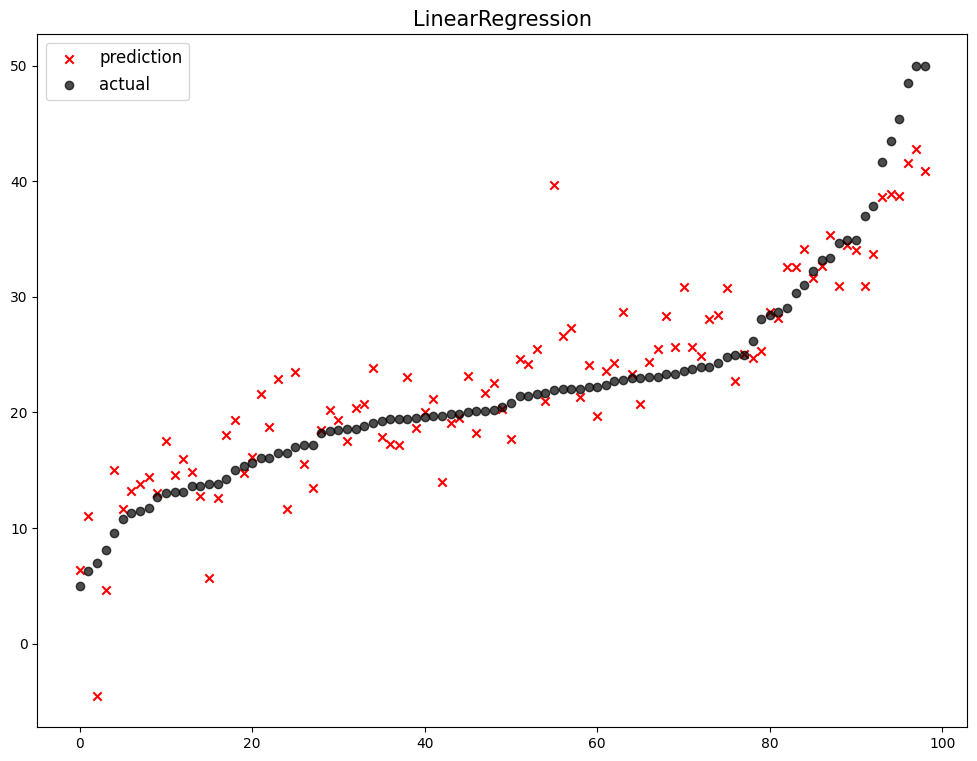

              model        mse
0  LinearRegression  16.471204


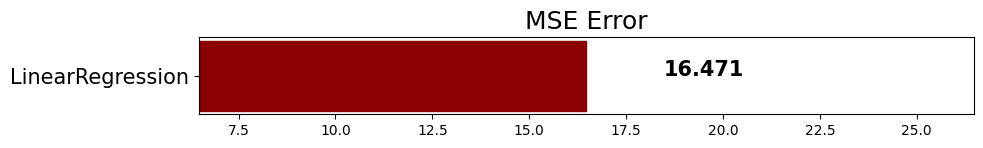

In [ ]:
mse_eval('LinearRegression', pred, y_test)

# **5. 규제(Regularization)**

* 학습이 과대적합 되는 것을 방지하고자 일종의 penalty를 부여하는 것
* L2 규제(릿지, Ridge)
  - 각 가중치 제곱의 합에 규제 강도 λ를 곱함
  - λ를 크게 하면 가중치가 더 많이 감소되고(규제를 중요시함), λ를 작게 하면 가중치가 증가함(규제를 중요시 하지 않음)
  - $Error=MSE+αw^2$
* L1 규제(라쏘, Lasso)
  - 가중치의 제곱의 합이 아닌 가중치의 합을 더한 값에 규제 강도 λ를 곱하여 오차에 더함
  - 어떤 가중치(w)는 실제로 0이됨. 즉 모델에서 완전히 제외되는 특성이 생김
  - $Error=MSE+α|w|$

> L2 규제가 L1 규제에 비해 안정적이라 일반적으로 L2 규제가 더 많이 사용

* [유튜브-릿지& 라쏘 회귀 (다중 회귀)](https://www.youtube.com/watch?v=MSddyk7Hsxc)

### **5-1. 릿지(Ridge)**

In [ ]:
from sklearn.linear_model import Ridge

In [ ]:
# 값이 클수록 큰 규제
alphas = [100, 10, 1, 0.1, 0.01, 0.001, 0.0001]

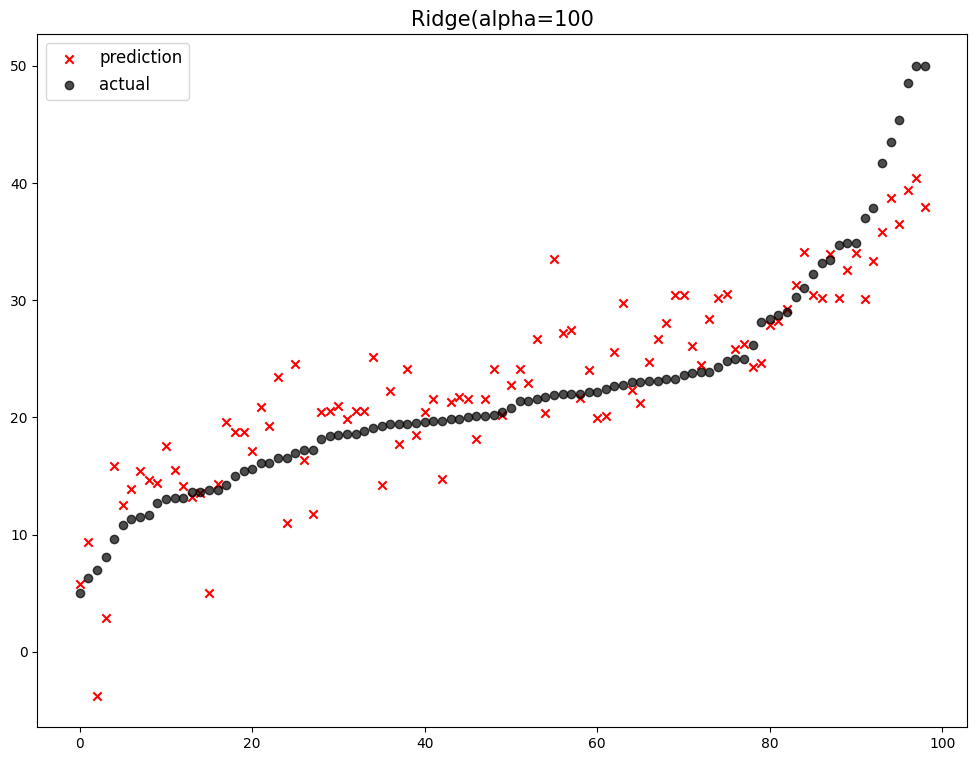

              model        mse
0   Ridge(alpha=100  19.169436
1  LinearRegression  16.471204


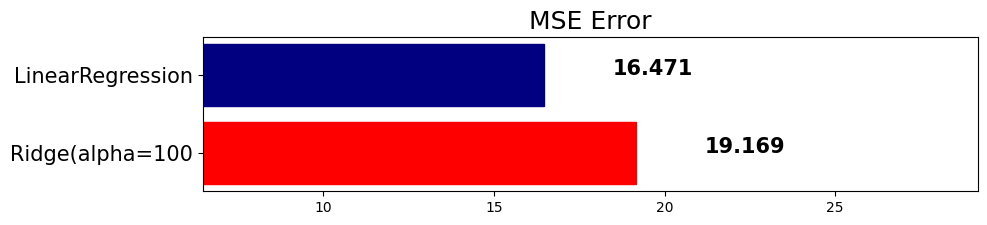

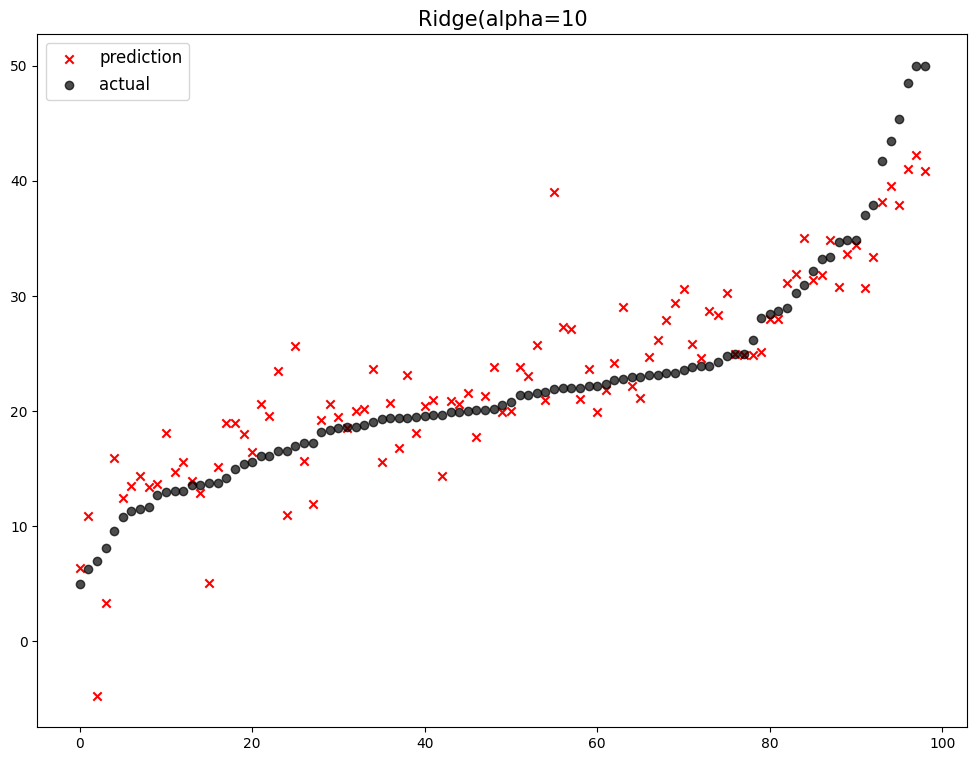

              model        mse
0   Ridge(alpha=100  19.169436
1    Ridge(alpha=10  17.826386
2  LinearRegression  16.471204


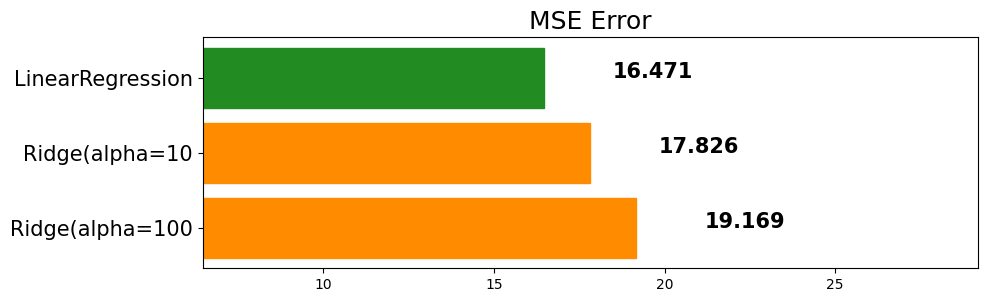

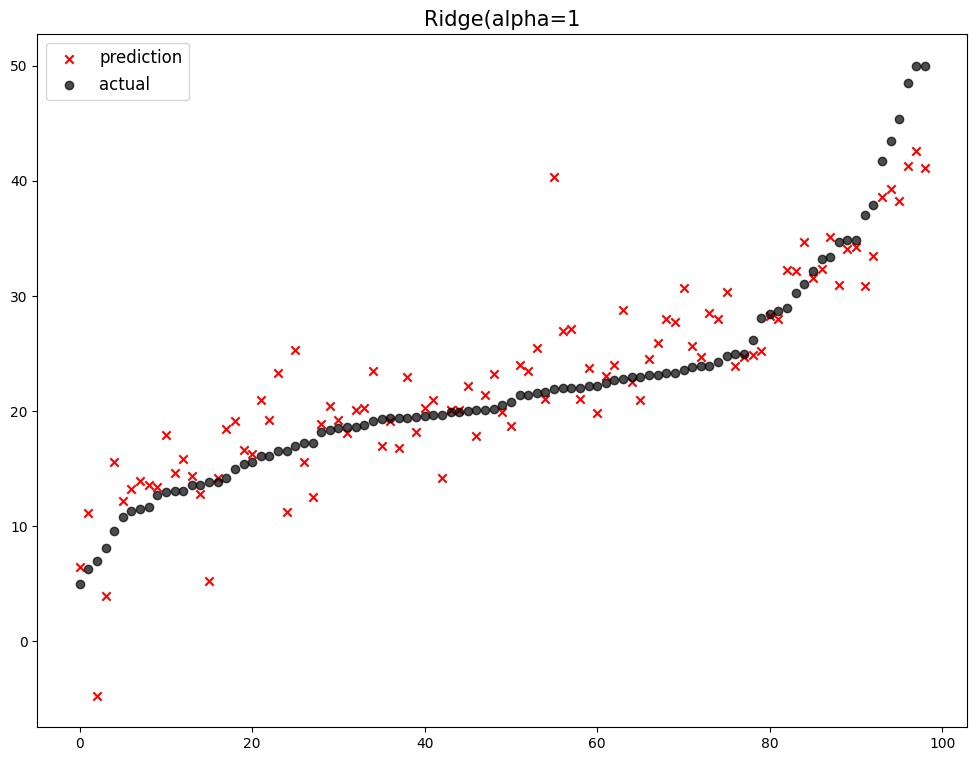

              model        mse
0   Ridge(alpha=100  19.169436
1    Ridge(alpha=10  17.826386
2     Ridge(alpha=1  17.273967
3  LinearRegression  16.471204


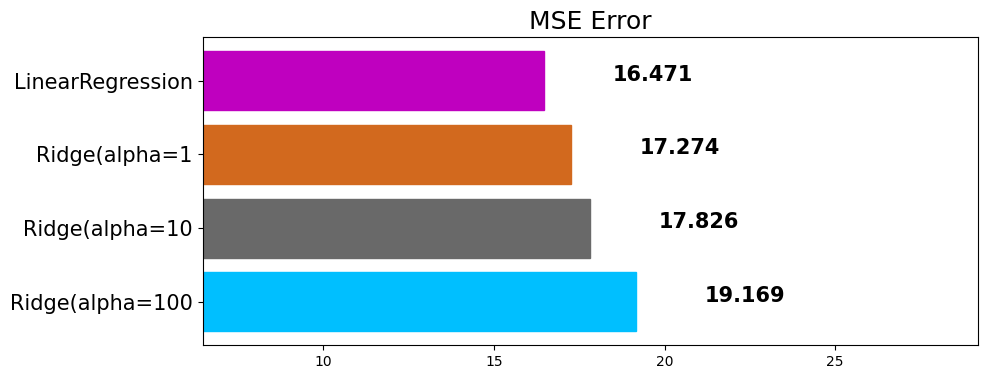

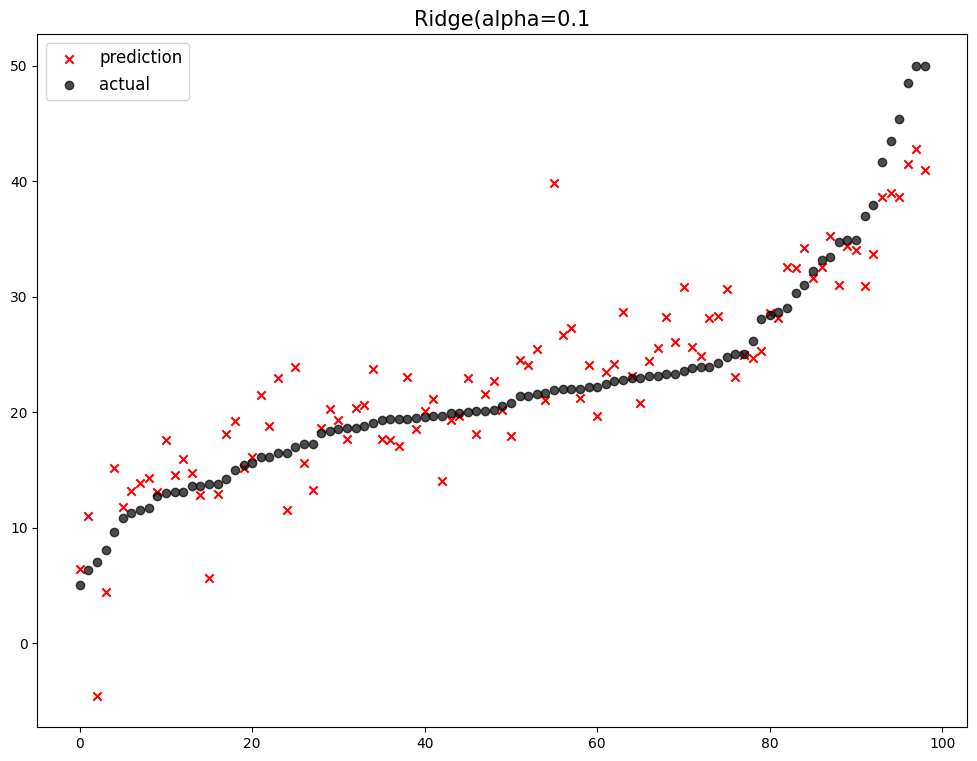

              model        mse
0   Ridge(alpha=100  19.169436
1    Ridge(alpha=10  17.826386
2     Ridge(alpha=1  17.273967
3   Ridge(alpha=0.1  16.588536
4  LinearRegression  16.471204


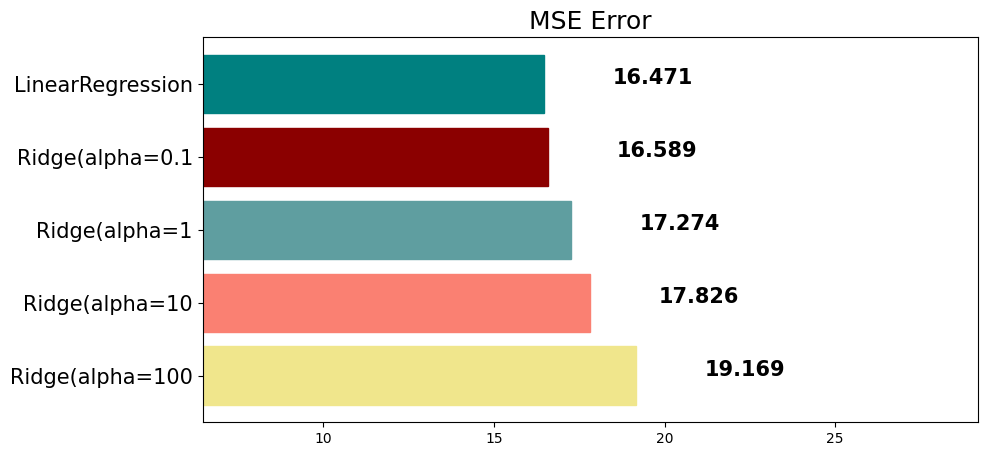

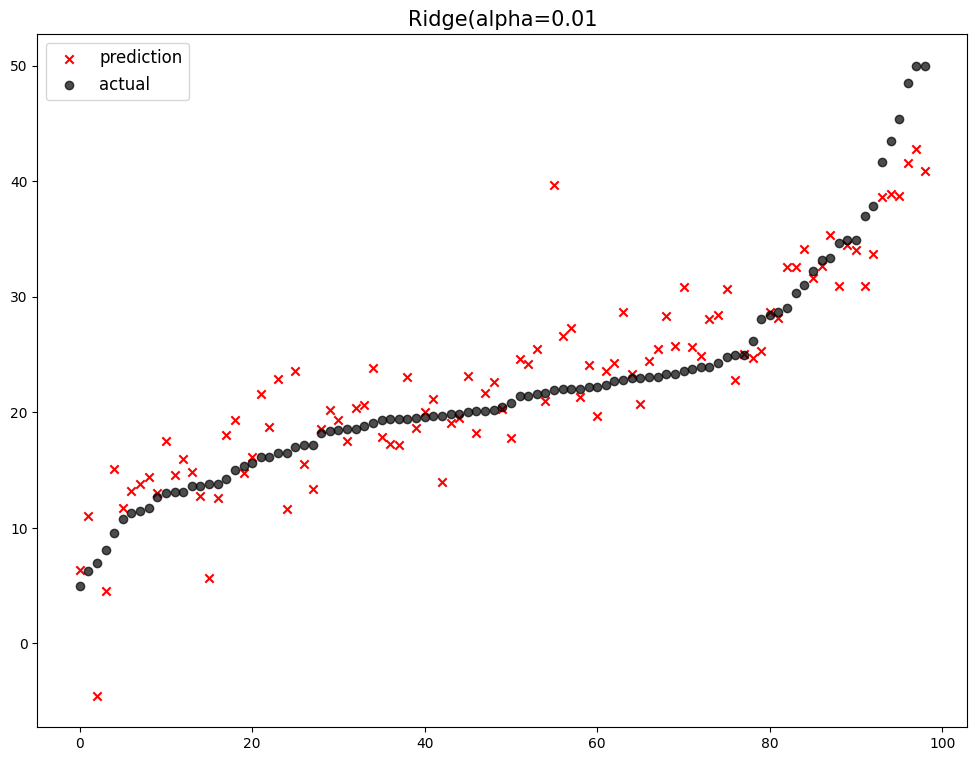

              model        mse
0   Ridge(alpha=100  19.169436
1    Ridge(alpha=10  17.826386
2     Ridge(alpha=1  17.273967
3   Ridge(alpha=0.1  16.588536
4  Ridge(alpha=0.01  16.482936
5  LinearRegression  16.471204


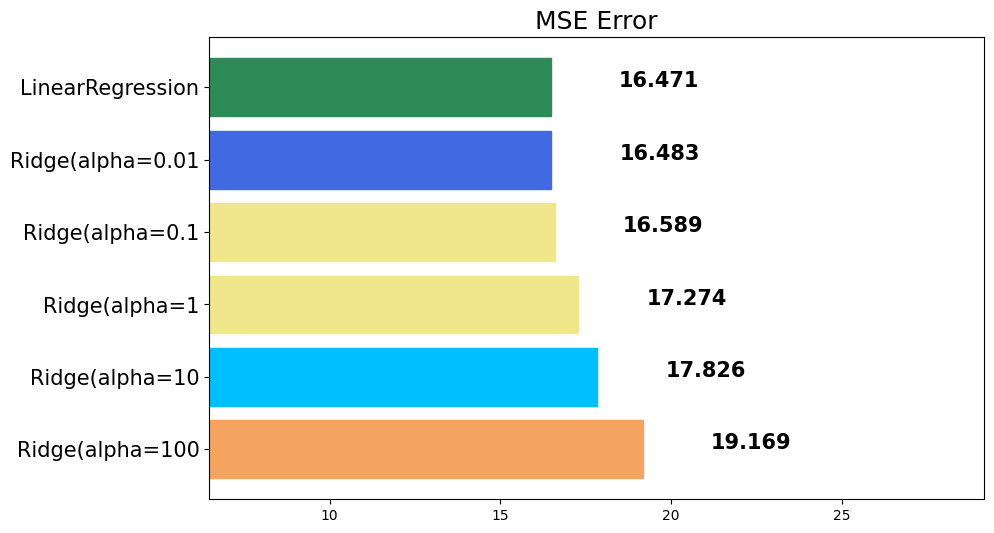

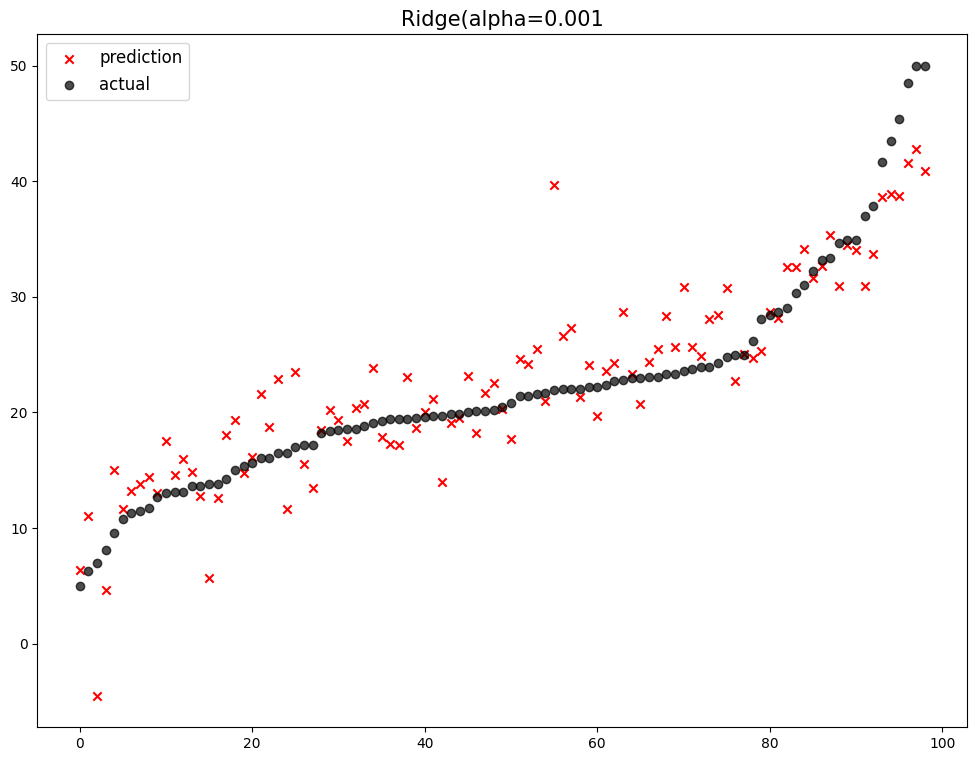

               model        mse
0    Ridge(alpha=100  19.169436
1     Ridge(alpha=10  17.826386
2      Ridge(alpha=1  17.273967
3    Ridge(alpha=0.1  16.588536
4   Ridge(alpha=0.01  16.482936
5  Ridge(alpha=0.001  16.472375
6   LinearRegression  16.471204


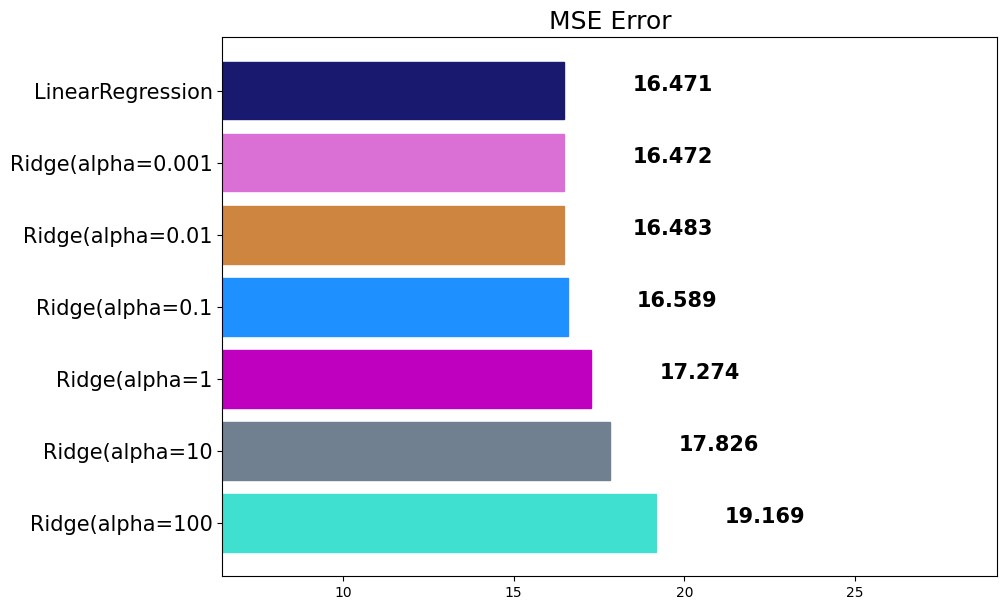

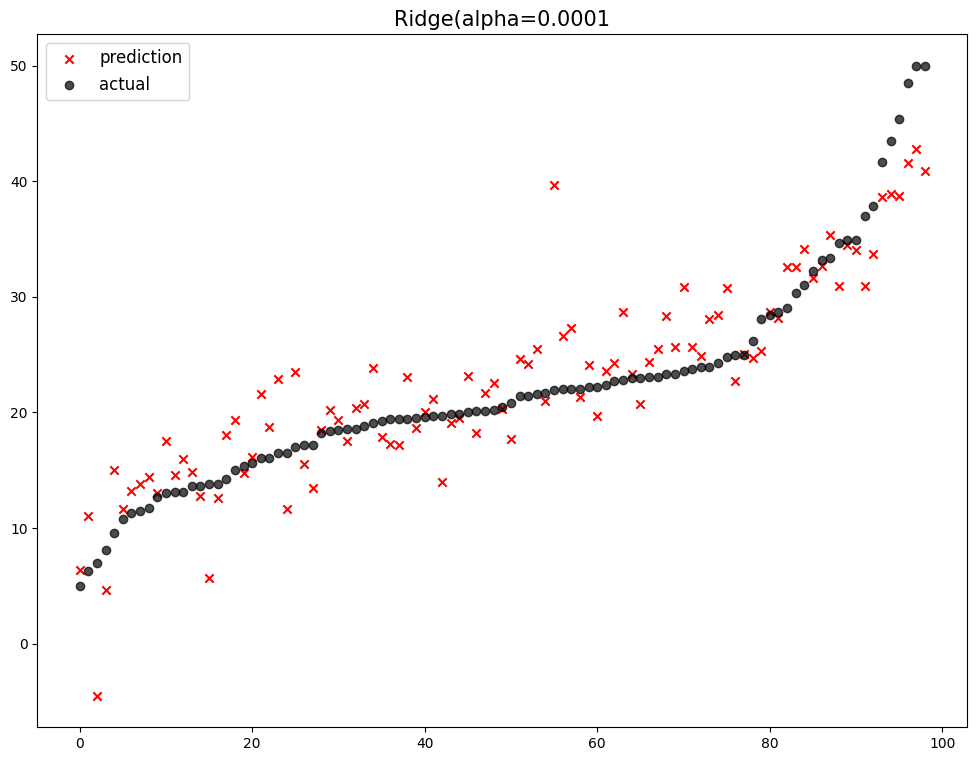

                model        mse
0     Ridge(alpha=100  19.169436
1      Ridge(alpha=10  17.826386
2       Ridge(alpha=1  17.273967
3     Ridge(alpha=0.1  16.588536
4    Ridge(alpha=0.01  16.482936
5   Ridge(alpha=0.001  16.472375
6  Ridge(alpha=0.0001  16.471321
7    LinearRegression  16.471204


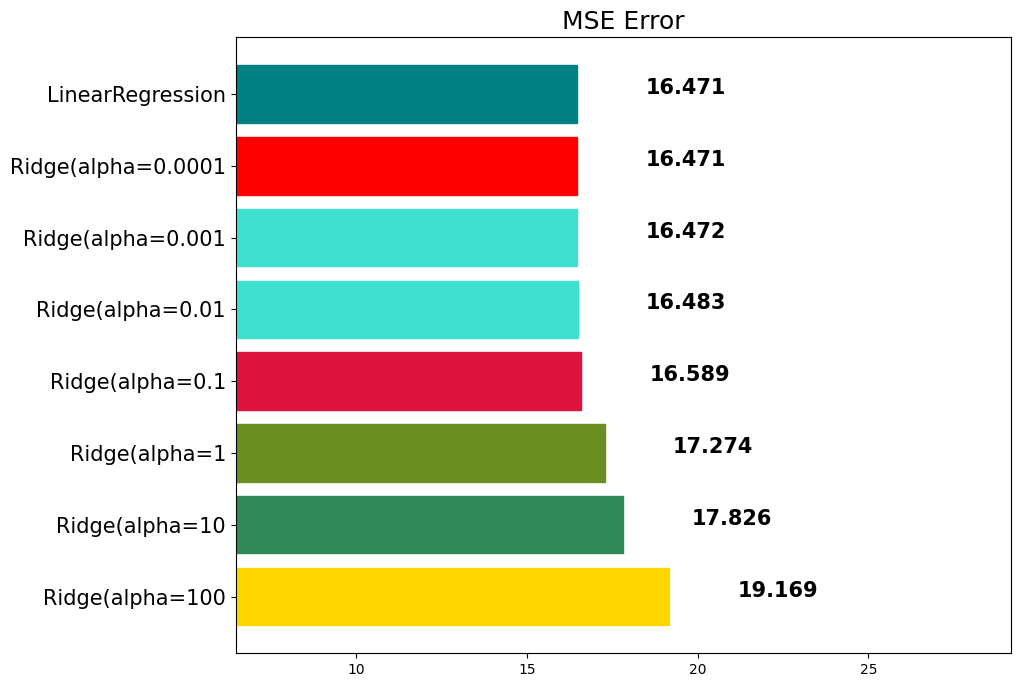

In [ ]:
for alpha in alphas:
  ridge = Ridge(alpha=alpha)
  ridge.fit(x_train, y_train)
  pred = ridge.predict(x_test)
  mse_eval('Ridge(alpha={}'.format(alpha), pred, y_test)

In [ ]:
x_train.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT'],
      dtype='object')

In [ ]:
ridge.coef_

array([ -0.10881472,   0.03895769,   0.01668285,   3.71582996,
       -16.02780724,   4.35725655,  -0.00054956,  -1.30465772,
         0.24328287,  -0.00978652,  -0.84195458,   0.00851366,
        -0.49740598])

In [ ]:
def plot_coef(columns, coef):
    coef_df = pd.DataFrame(list(zip(columns, coef)))
    coef_df.columns=['feature', 'coef']
    coef_df = coef_df.sort_values('coef', ascending=False).reset_index(drop=True)

    fig, ax = plt.subplots(figsize=(9, 7))
    ax.barh(np.arange(len(coef_df)), coef_df['coef'])
    idx = np.arange(len(coef_df))
    ax.set_yticks(idx)
    ax.set_yticklabels(coef_df['feature'])
    fig.tight_layout()
    plt.show()

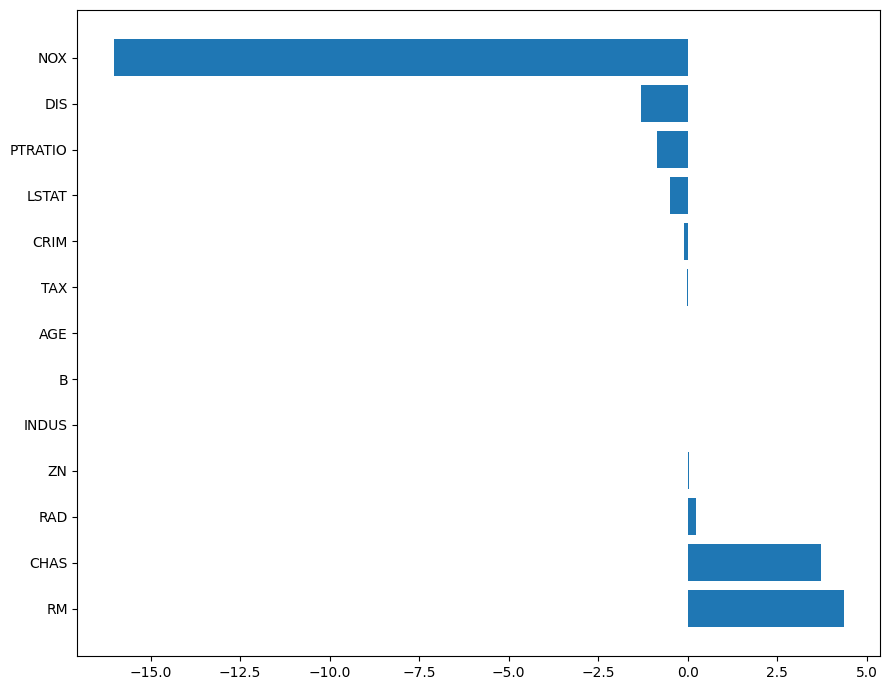

In [ ]:
plot_coef(x_train.columns, ridge.coef_)

In [ ]:
ridge_100 = Ridge(alpha=100)
ridge_100.fit(x_train, y_train)
ridge_pred_100 = ridge_100.predict(x_test)

ridge_001 = Ridge(alpha=0.001)
ridge_001.fit(x_train, y_train)
ridge_pred_001 = ridge_001.predict(x_test)

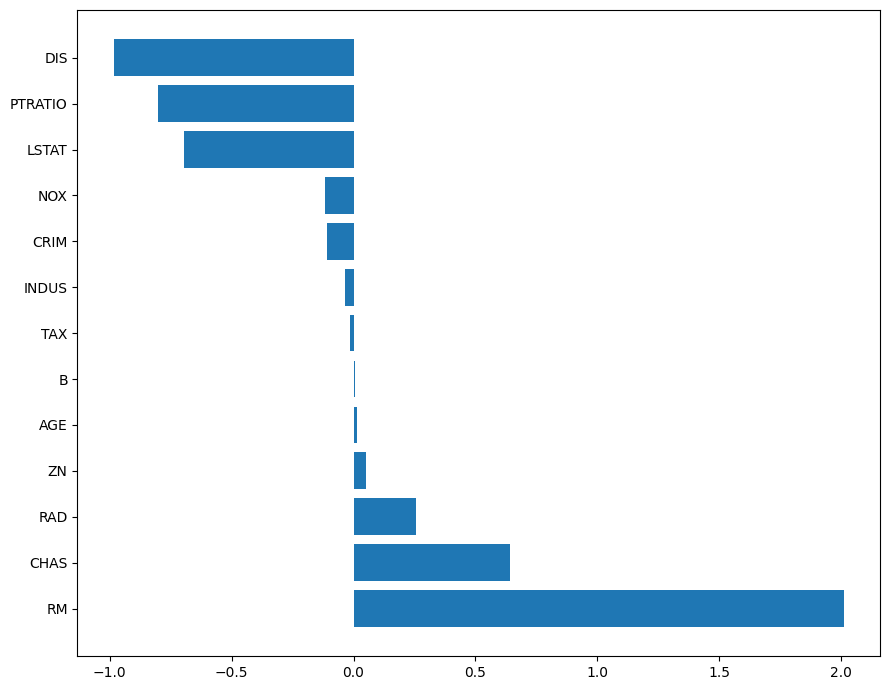

In [ ]:
plot_coef(x_train.columns, ridge_100.coef_)

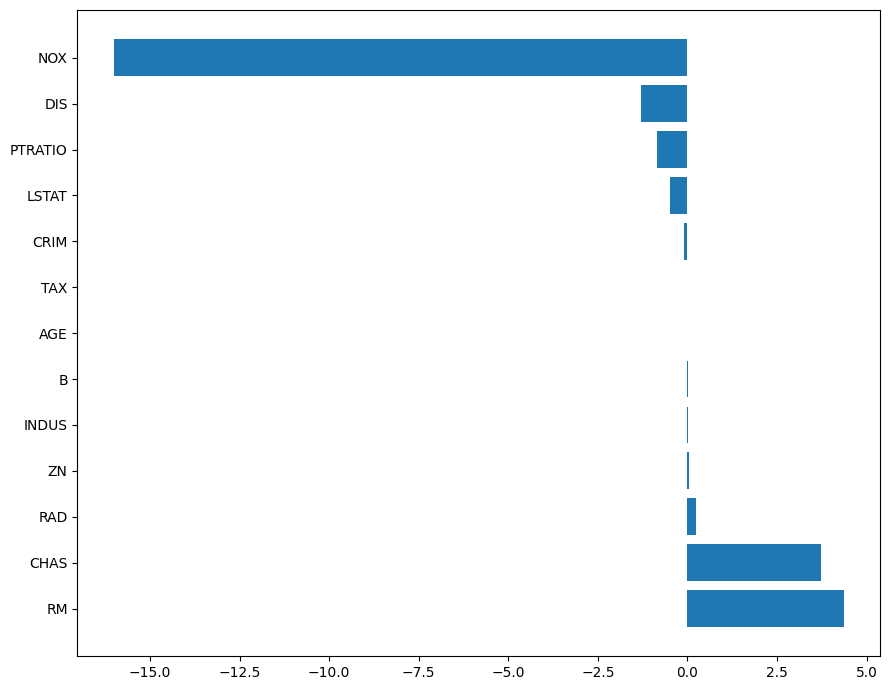

In [ ]:
plot_coef(x_train.columns, ridge_001.coef_)

### **5-2. 라쏘(Lasso)**

In [ ]:
from sklearn.linear_model import Lasso

In [ ]:
# 값이 클수록 큰 규제
alphas = [100, 10, 1, 0.1, 0.01, 0.001, 0.0001]

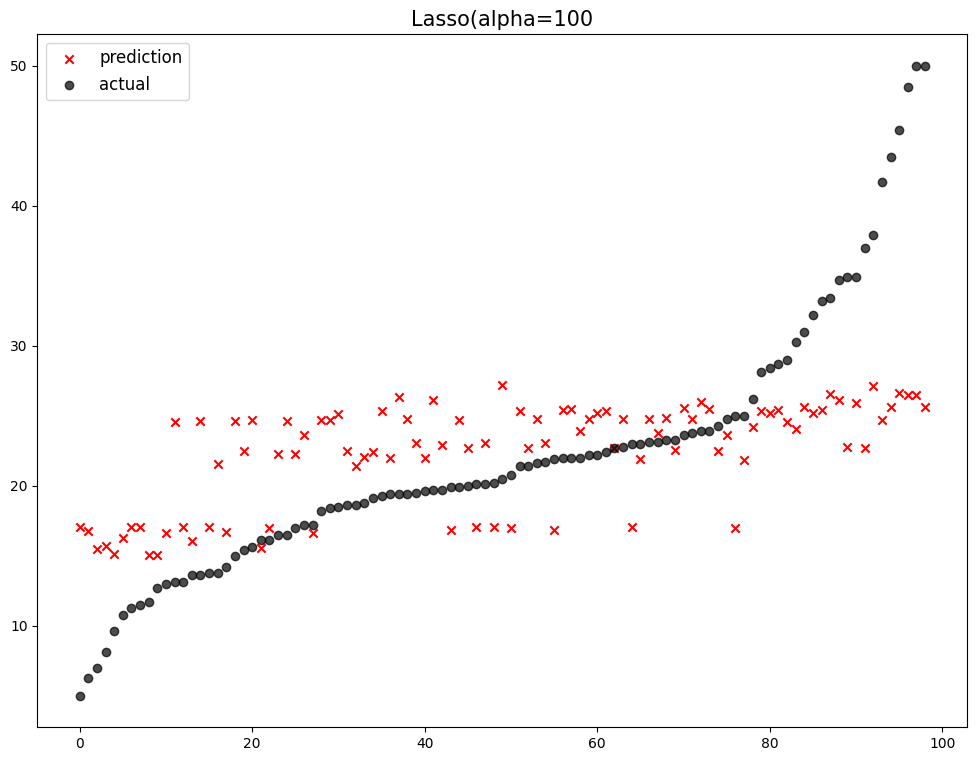

                model        mse
0     Ridge(alpha=100  55.680054
1     Lasso(alpha=100  55.680054
2      Ridge(alpha=10  31.850946
3       Ridge(alpha=1  21.678470
4     Ridge(alpha=0.1  18.000711
5    Ridge(alpha=0.01  16.720561
6   Ridge(alpha=0.001  16.489815
7  Ridge(alpha=0.0001  16.473001
8    LinearRegression  16.471204


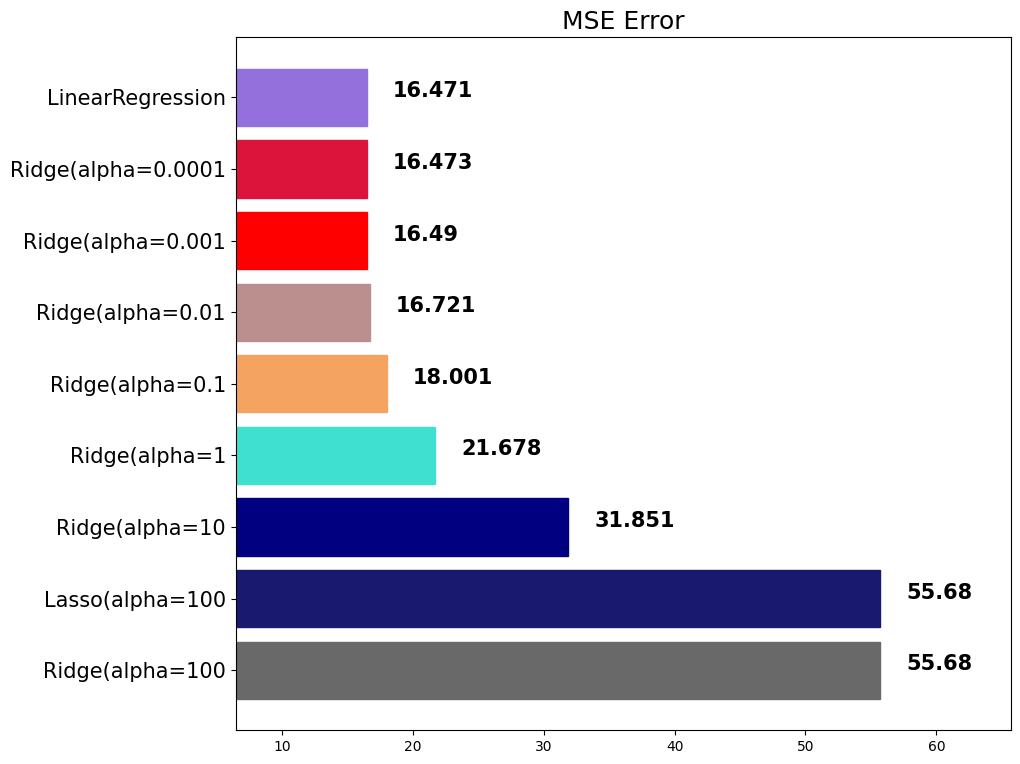

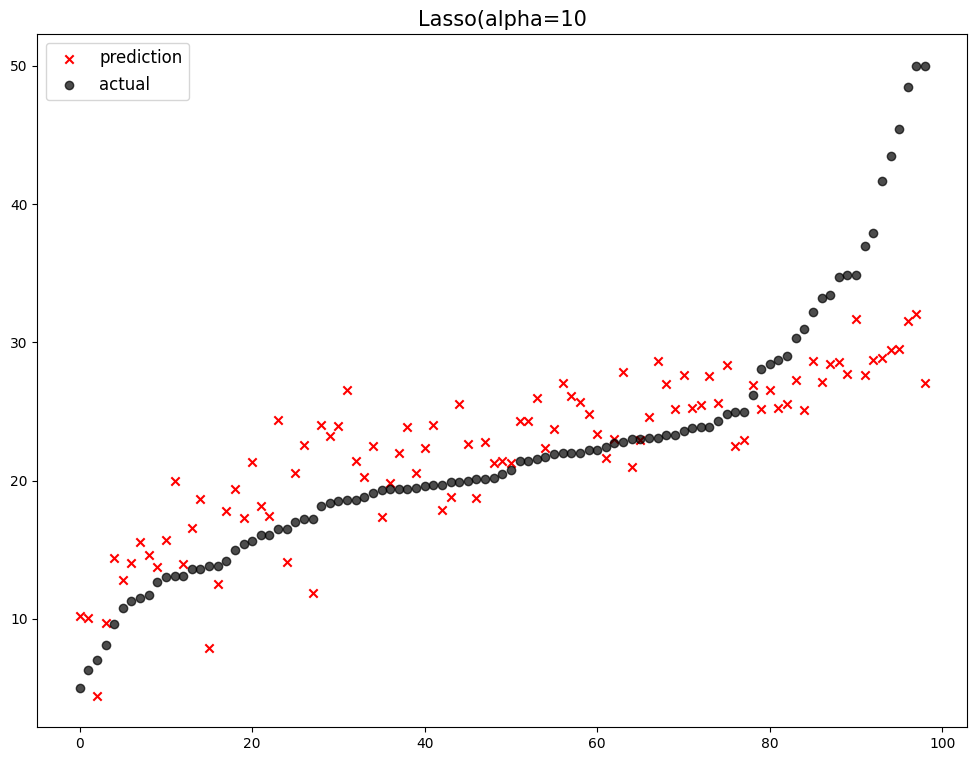

                model        mse
0     Ridge(alpha=100  55.680054
1     Lasso(alpha=100  55.680054
2      Ridge(alpha=10  31.850946
3      Lasso(alpha=10  31.850946
4       Ridge(alpha=1  21.678470
5     Ridge(alpha=0.1  18.000711
6    Ridge(alpha=0.01  16.720561
7   Ridge(alpha=0.001  16.489815
8  Ridge(alpha=0.0001  16.473001
9    LinearRegression  16.471204


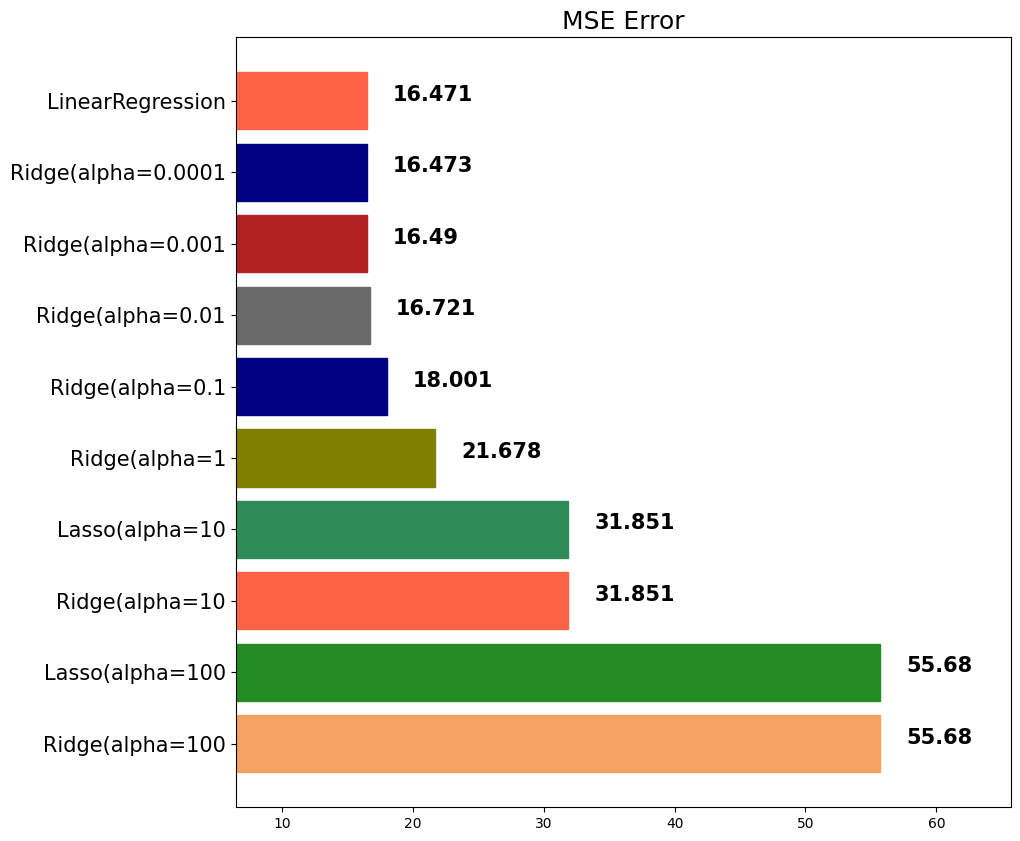

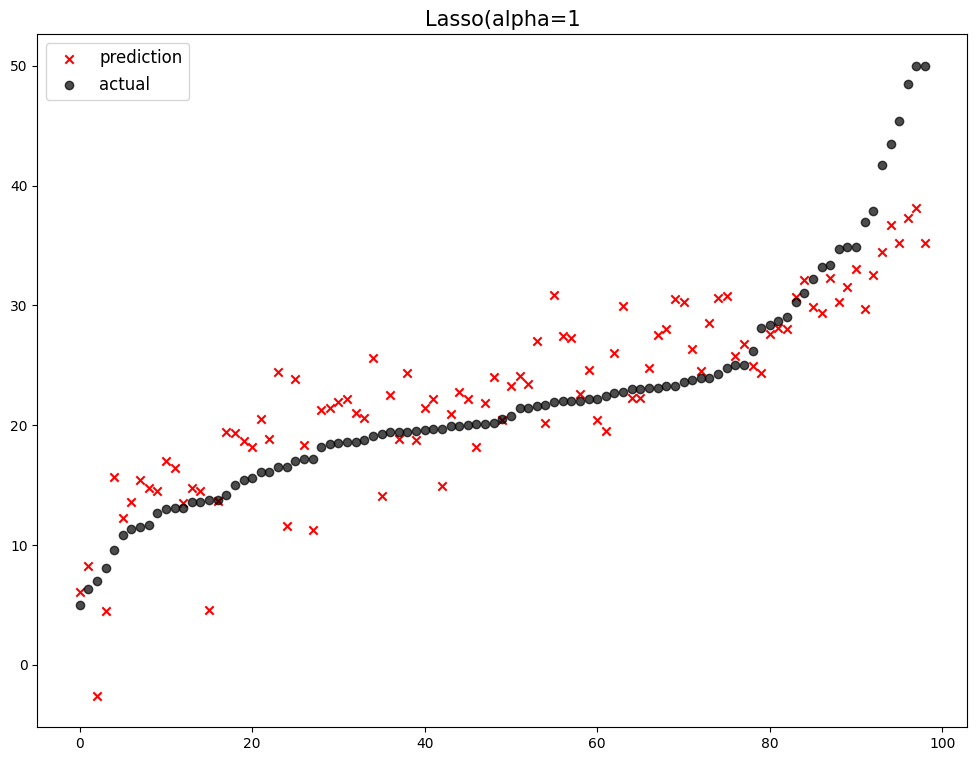

                 model        mse
0      Ridge(alpha=100  55.680054
1      Lasso(alpha=100  55.680054
2       Ridge(alpha=10  31.850946
3       Lasso(alpha=10  31.850946
4        Ridge(alpha=1  21.678470
5        Lasso(alpha=1  21.678470
6      Ridge(alpha=0.1  18.000711
7     Ridge(alpha=0.01  16.720561
8    Ridge(alpha=0.001  16.489815
9   Ridge(alpha=0.0001  16.473001
10    LinearRegression  16.471204


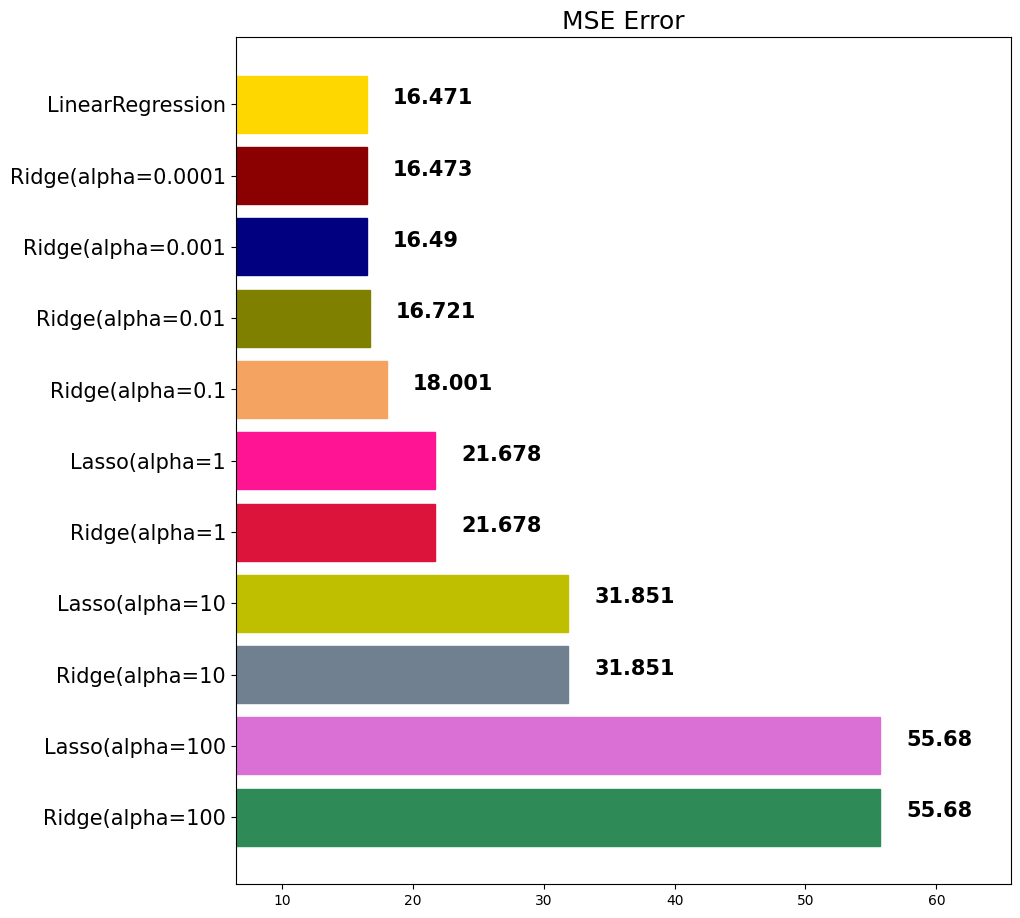

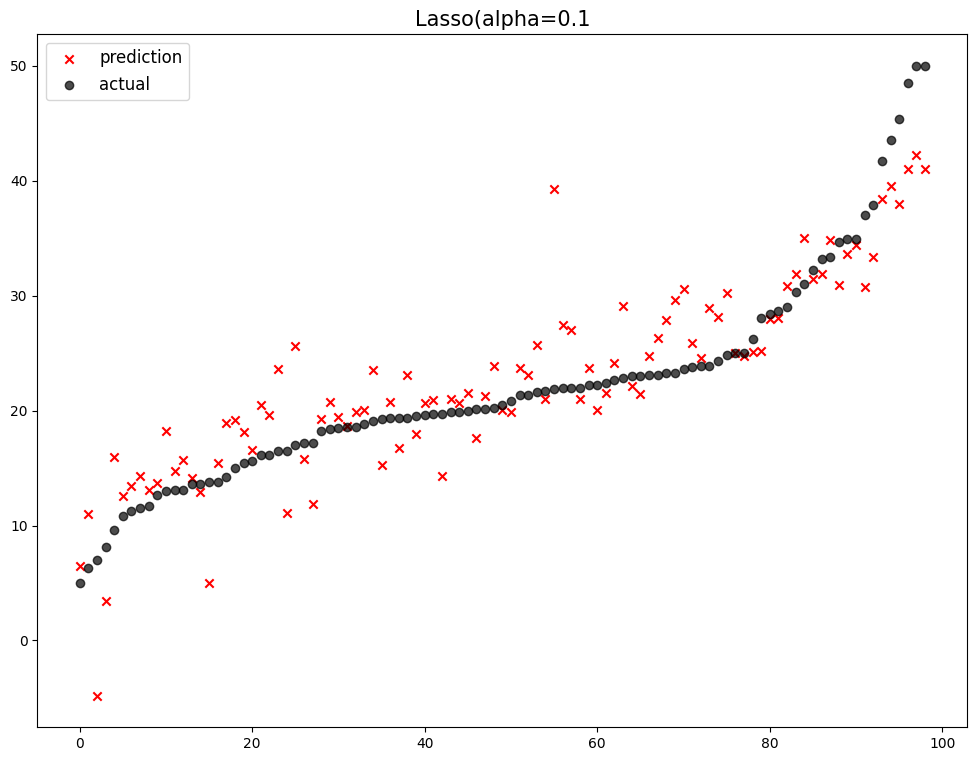

                 model        mse
0      Ridge(alpha=100  55.680054
1      Lasso(alpha=100  55.680054
2       Ridge(alpha=10  31.850946
3       Lasso(alpha=10  31.850946
4        Ridge(alpha=1  21.678470
5        Lasso(alpha=1  21.678470
6      Ridge(alpha=0.1  18.000711
7      Lasso(alpha=0.1  18.000711
8     Ridge(alpha=0.01  16.720561
9    Ridge(alpha=0.001  16.489815
10  Ridge(alpha=0.0001  16.473001
11    LinearRegression  16.471204


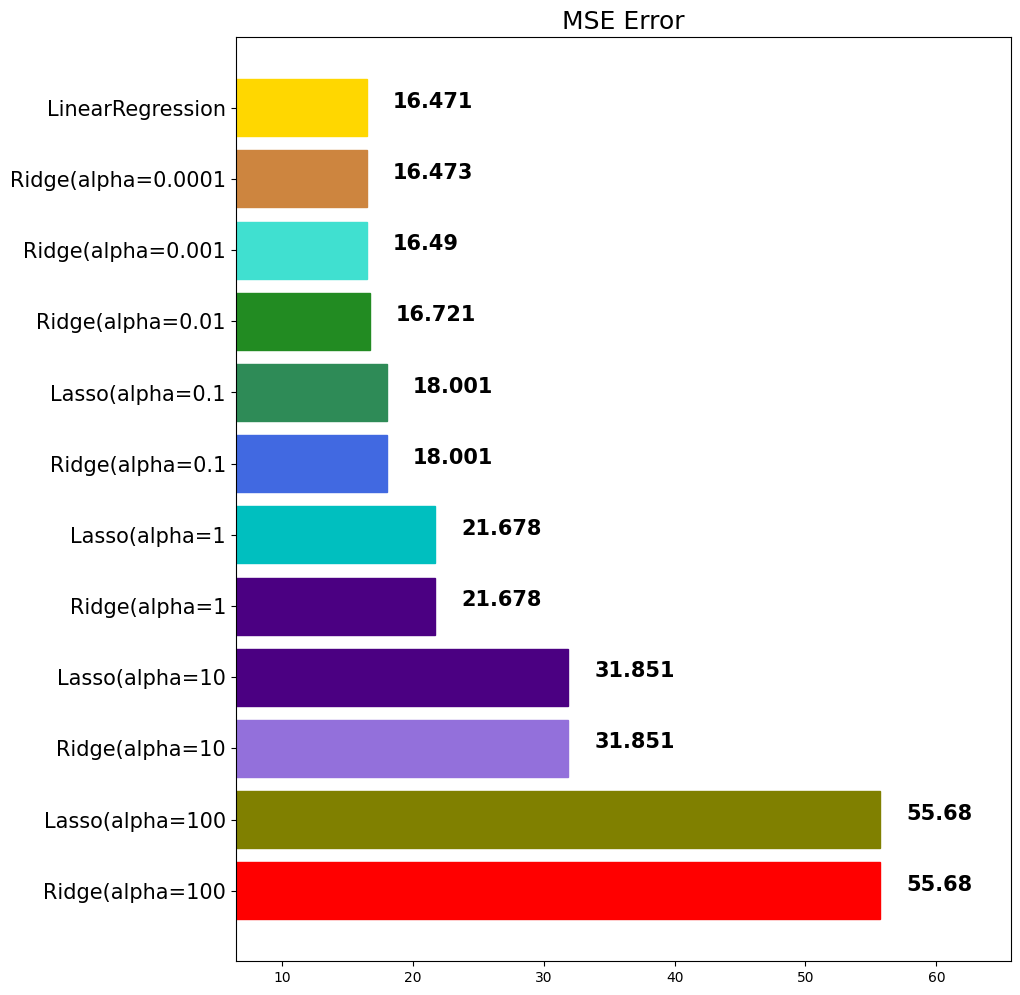

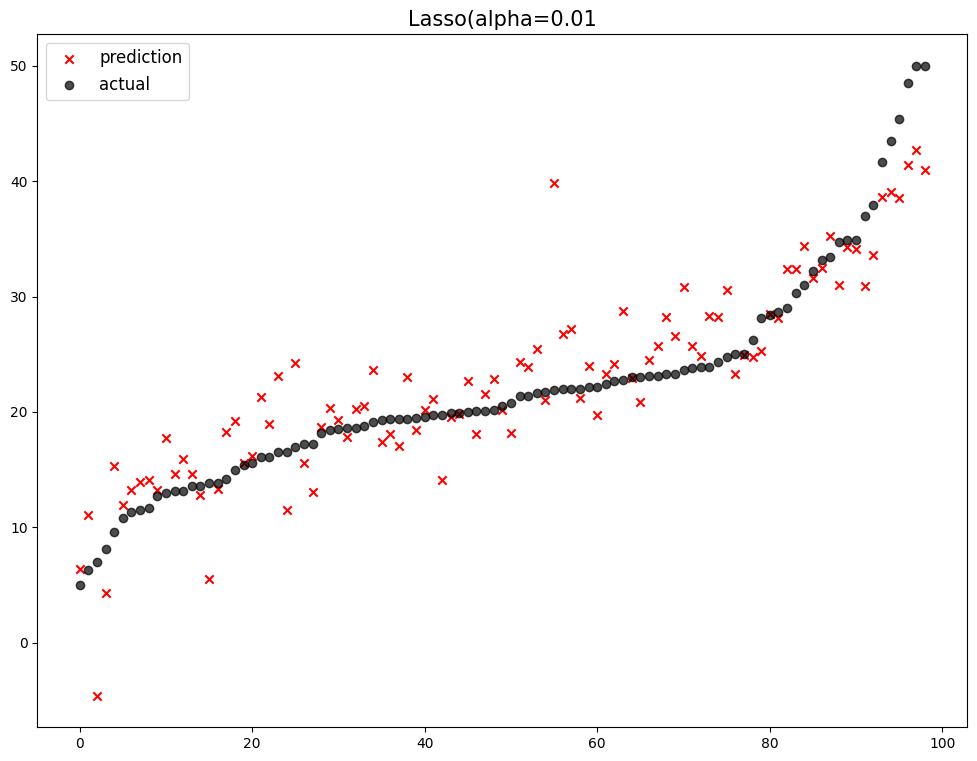

                 model        mse
0      Ridge(alpha=100  55.680054
1      Lasso(alpha=100  55.680054
2       Ridge(alpha=10  31.850946
3       Lasso(alpha=10  31.850946
4        Ridge(alpha=1  21.678470
5        Lasso(alpha=1  21.678470
6      Ridge(alpha=0.1  18.000711
7      Lasso(alpha=0.1  18.000711
8     Ridge(alpha=0.01  16.720561
9     Lasso(alpha=0.01  16.720561
10   Ridge(alpha=0.001  16.489815
11  Ridge(alpha=0.0001  16.473001
12    LinearRegression  16.471204


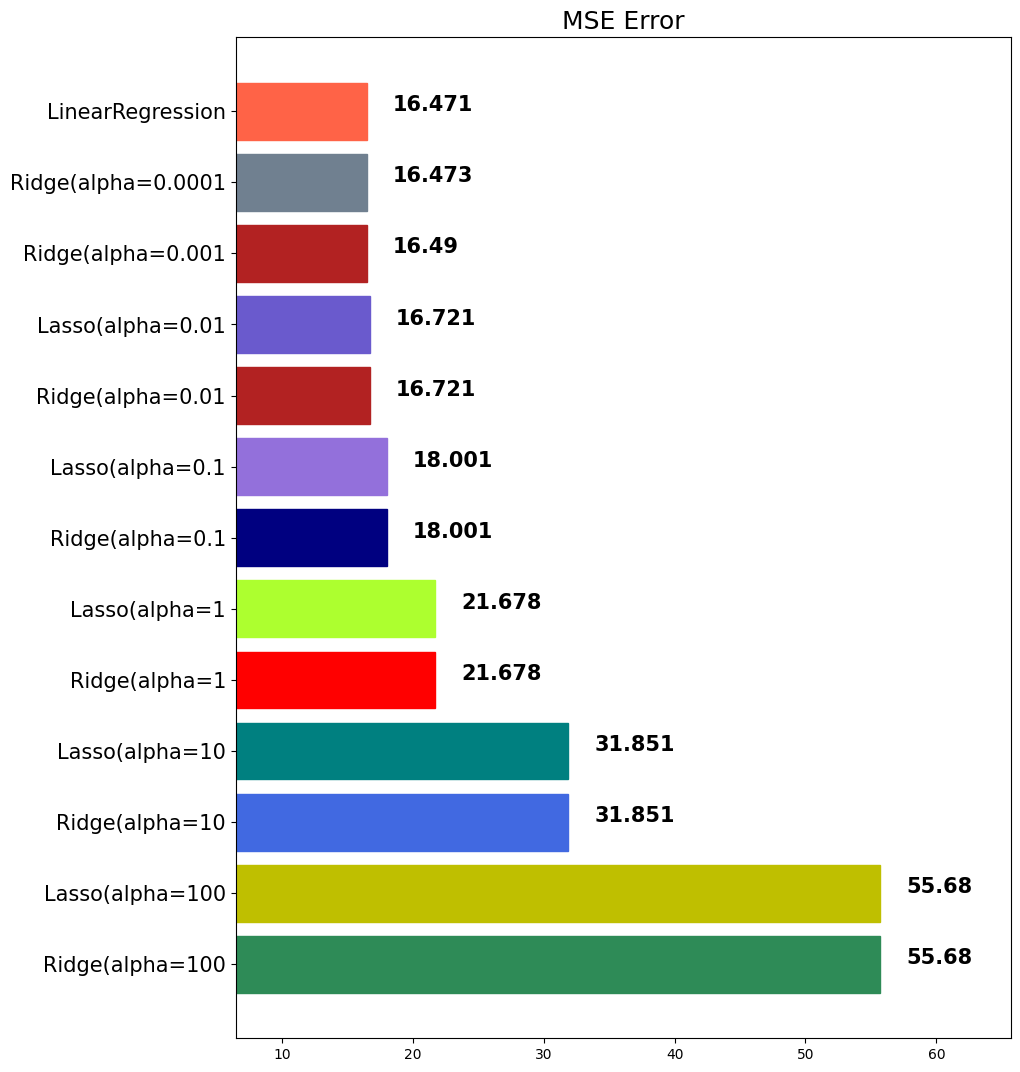

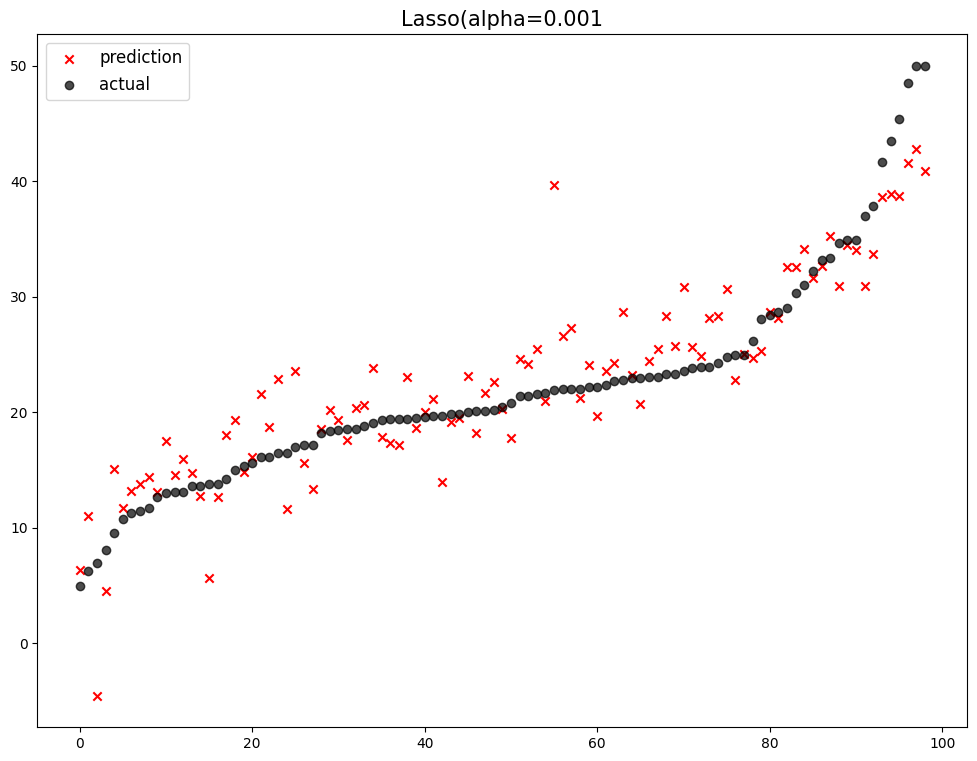

                 model        mse
0      Ridge(alpha=100  55.680054
1      Lasso(alpha=100  55.680054
2       Ridge(alpha=10  31.850946
3       Lasso(alpha=10  31.850946
4        Ridge(alpha=1  21.678470
5        Lasso(alpha=1  21.678470
6      Ridge(alpha=0.1  18.000711
7      Lasso(alpha=0.1  18.000711
8     Ridge(alpha=0.01  16.720561
9     Lasso(alpha=0.01  16.720561
10   Ridge(alpha=0.001  16.489815
11   Lasso(alpha=0.001  16.489815
12  Ridge(alpha=0.0001  16.473001
13    LinearRegression  16.471204


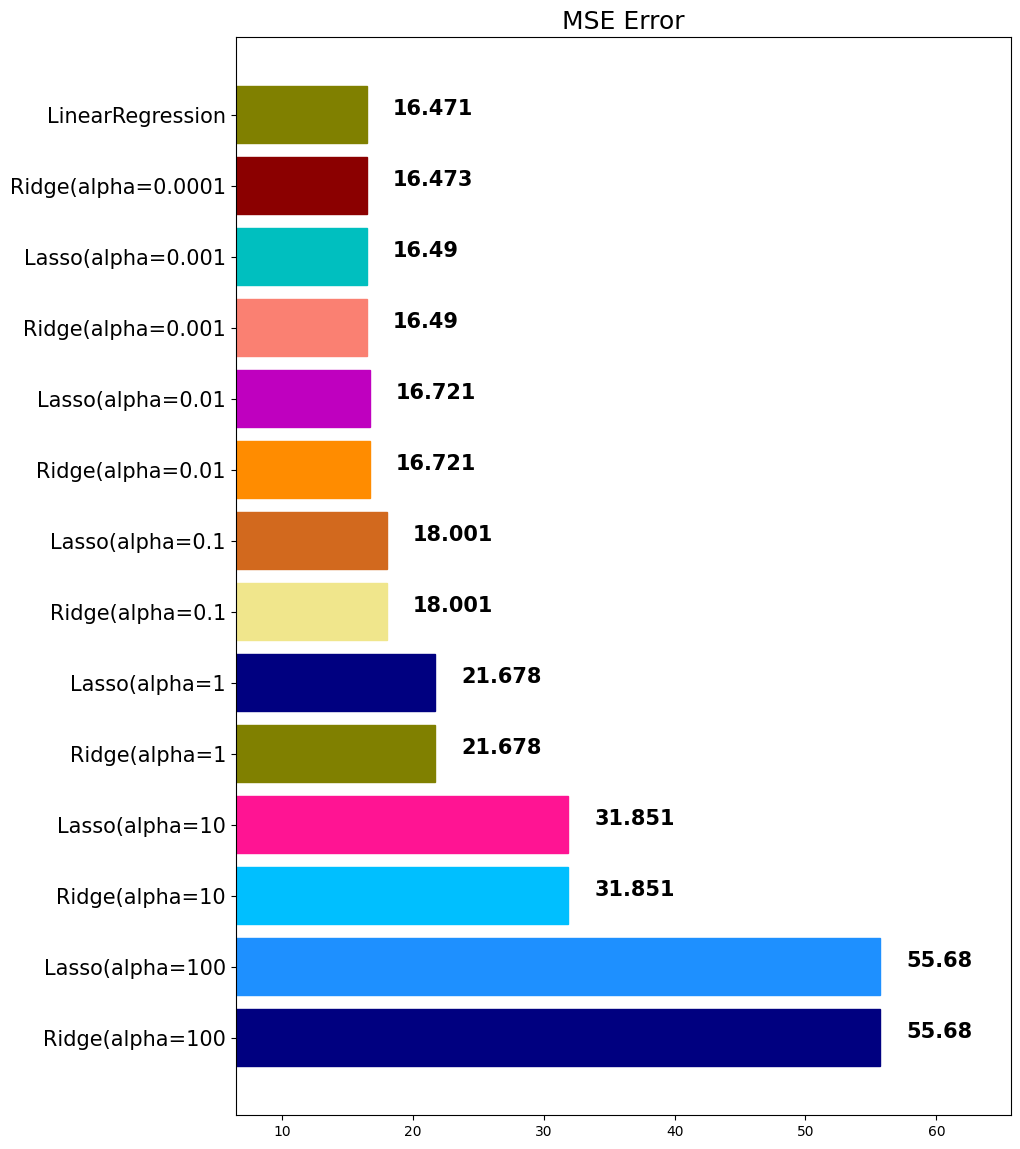

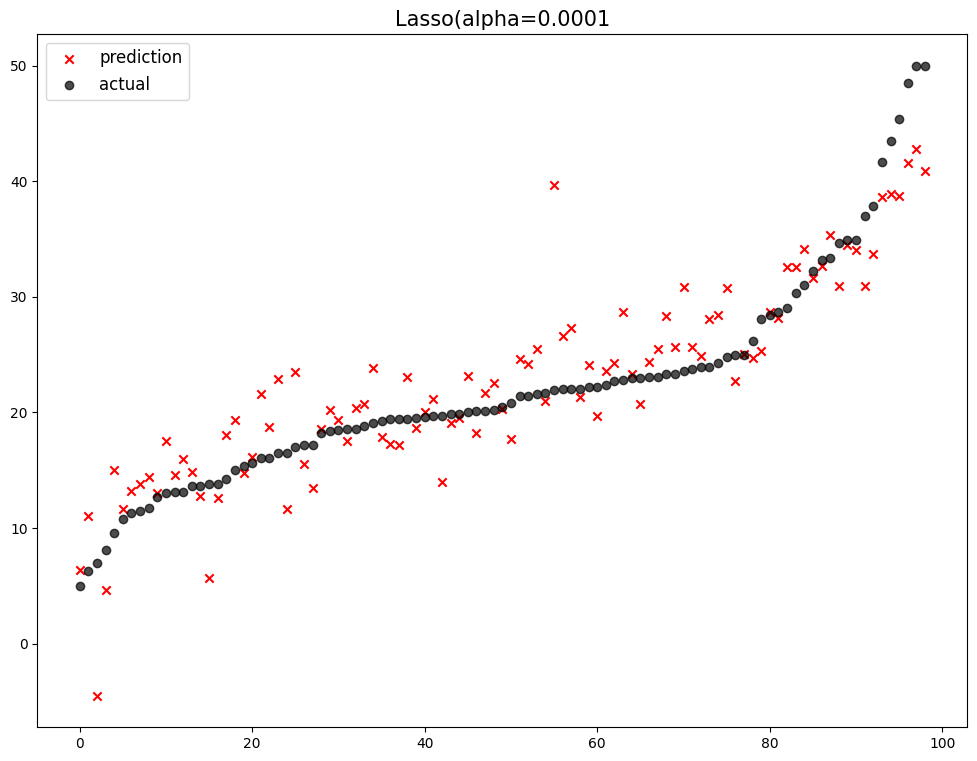

                 model        mse
0      Ridge(alpha=100  55.680054
1      Lasso(alpha=100  55.680054
2       Ridge(alpha=10  31.850946
3       Lasso(alpha=10  31.850946
4        Ridge(alpha=1  21.678470
5        Lasso(alpha=1  21.678470
6      Ridge(alpha=0.1  18.000711
7      Lasso(alpha=0.1  18.000711
8     Ridge(alpha=0.01  16.720561
9     Lasso(alpha=0.01  16.720561
10   Ridge(alpha=0.001  16.489815
11   Lasso(alpha=0.001  16.489815
12  Ridge(alpha=0.0001  16.473001
13  Lasso(alpha=0.0001  16.473001
14    LinearRegression  16.471204


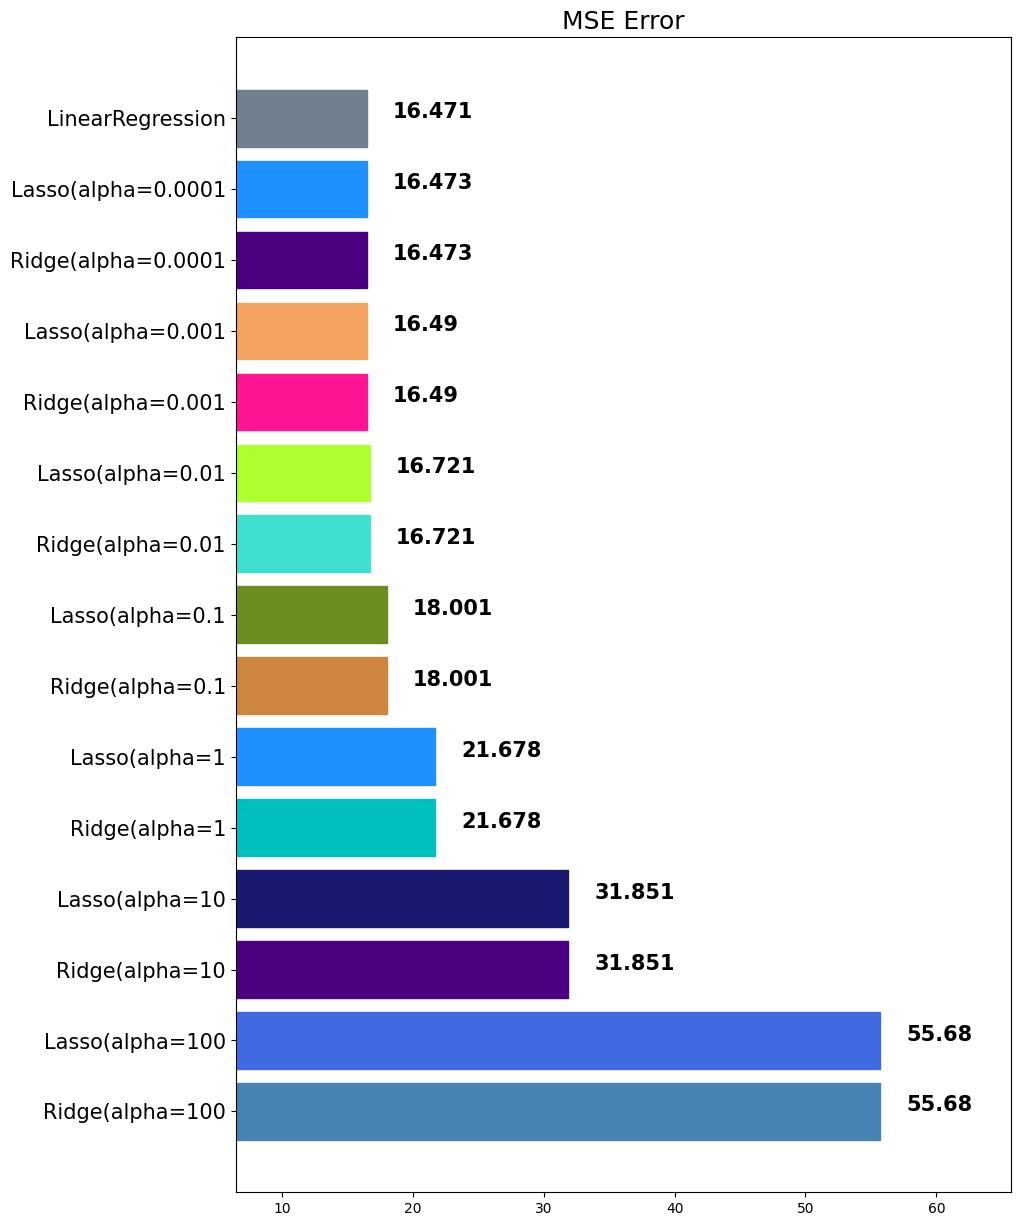

In [ ]:
for alpha in alphas:
  lasso = Lasso(alpha=alpha)
  lasso.fit(x_train, y_train)
  pred = lasso.predict(x_test)
  mse_eval('Lasso(alpha={}'.format(alpha), pred, y_test)

In [ ]:
# lasso coef 로 파악

In [ ]:
lasso_100 = Lasso(alpha=100)
lasso_100.fit(x_train, y_train)
lasso_pred_100 = lasso_100.predict(x_test)

lasso_001 = Lasso(alpha=0.001)
lasso_001.fit(x_train, y_train)
lasso_pred_001 = lasso_001.predict(x_test)

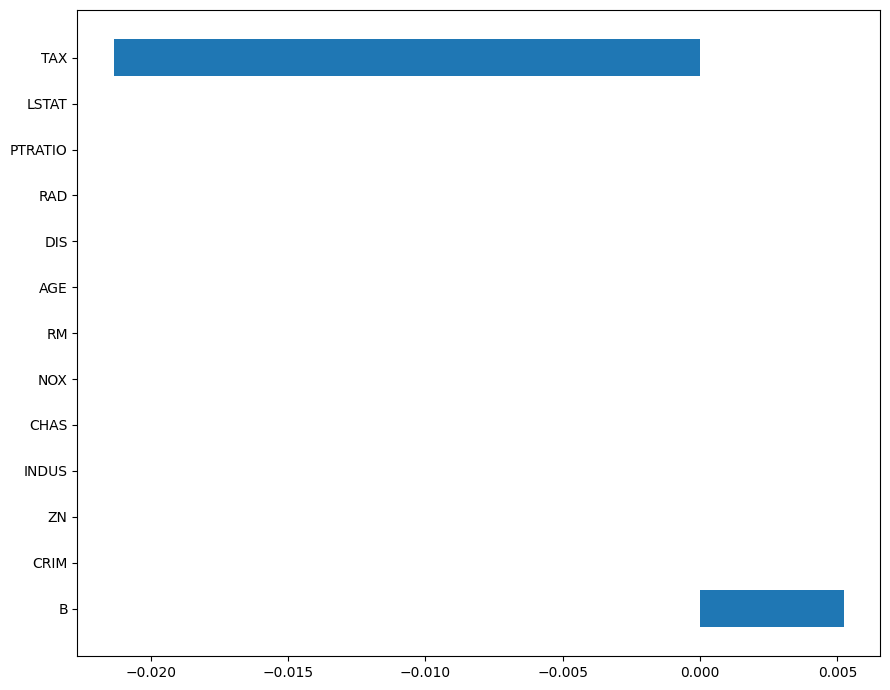

In [ ]:
plot_coef(x_train.columns, lasso_100.coef_)

In [ ]:
lasso_100.coef_

array([-0.        ,  0.        , -0.        ,  0.        , -0.        ,
        0.        , -0.        ,  0.        , -0.        , -0.02133219,
       -0.        ,  0.00521984, -0.        ])

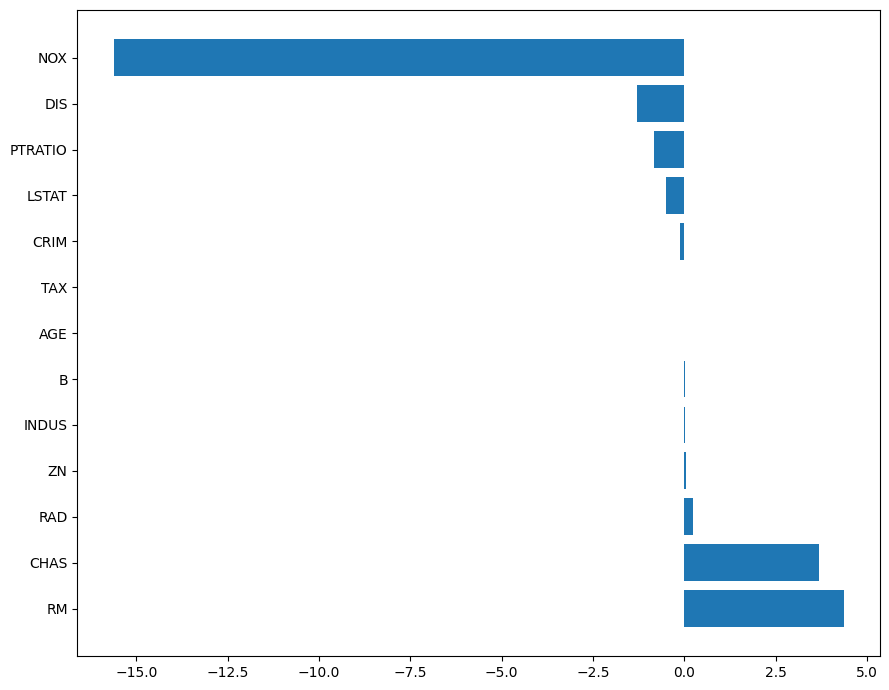

In [ ]:
plot_coef(x_train.columns, lasso_001.coef_)

In [ ]:
lasso_001.coef_

array([ -0.10863874,   0.03904198,   0.01524656,   3.70042576,
       -15.61687445,   4.35906654,  -0.00082594,  -1.29850487,
         0.24205404,  -0.00980409,  -0.83846258,   0.00853692,
        -0.49806142])

5-3. ElasticNet
* l1_ratio = 0 (L2 규제만 사용)
* l1_ratio = 1 (L1 규제만 사용)
* 0 < l1_radio < 1 (L1 and L2 규제의 혼합사용)

In [ ]:
from sklearn.linear_model import ElasticNet

In [ ]:
ratios = [0.2, 0.5, 0.8]

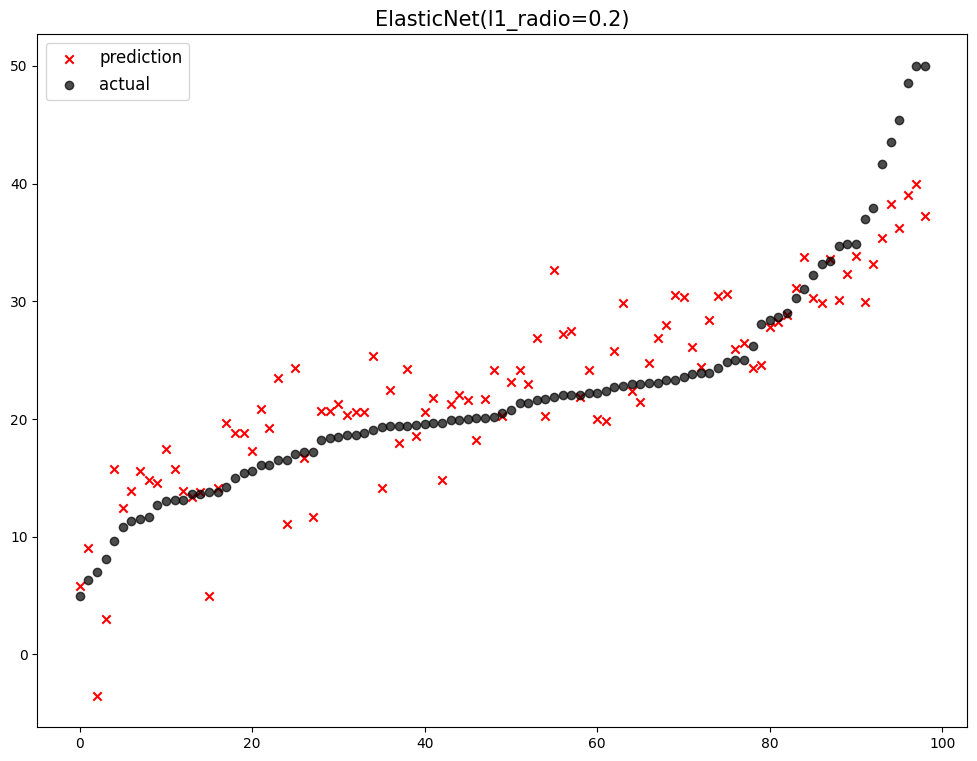

                       model        mse
0            Ridge(alpha=100  55.680054
1            Lasso(alpha=100  55.680054
2             Ridge(alpha=10  31.850946
3             Lasso(alpha=10  31.850946
4              Ridge(alpha=1  21.678470
5              Lasso(alpha=1  21.678470
6   ElasticNet(l1_radio=0.2)  19.707563
7            Ridge(alpha=0.1  18.000711
8            Lasso(alpha=0.1  18.000711
9           Ridge(alpha=0.01  16.720561
10          Lasso(alpha=0.01  16.720561
11         Ridge(alpha=0.001  16.489815
12         Lasso(alpha=0.001  16.489815
13        Ridge(alpha=0.0001  16.473001
14        Lasso(alpha=0.0001  16.473001
15          LinearRegression  16.471204


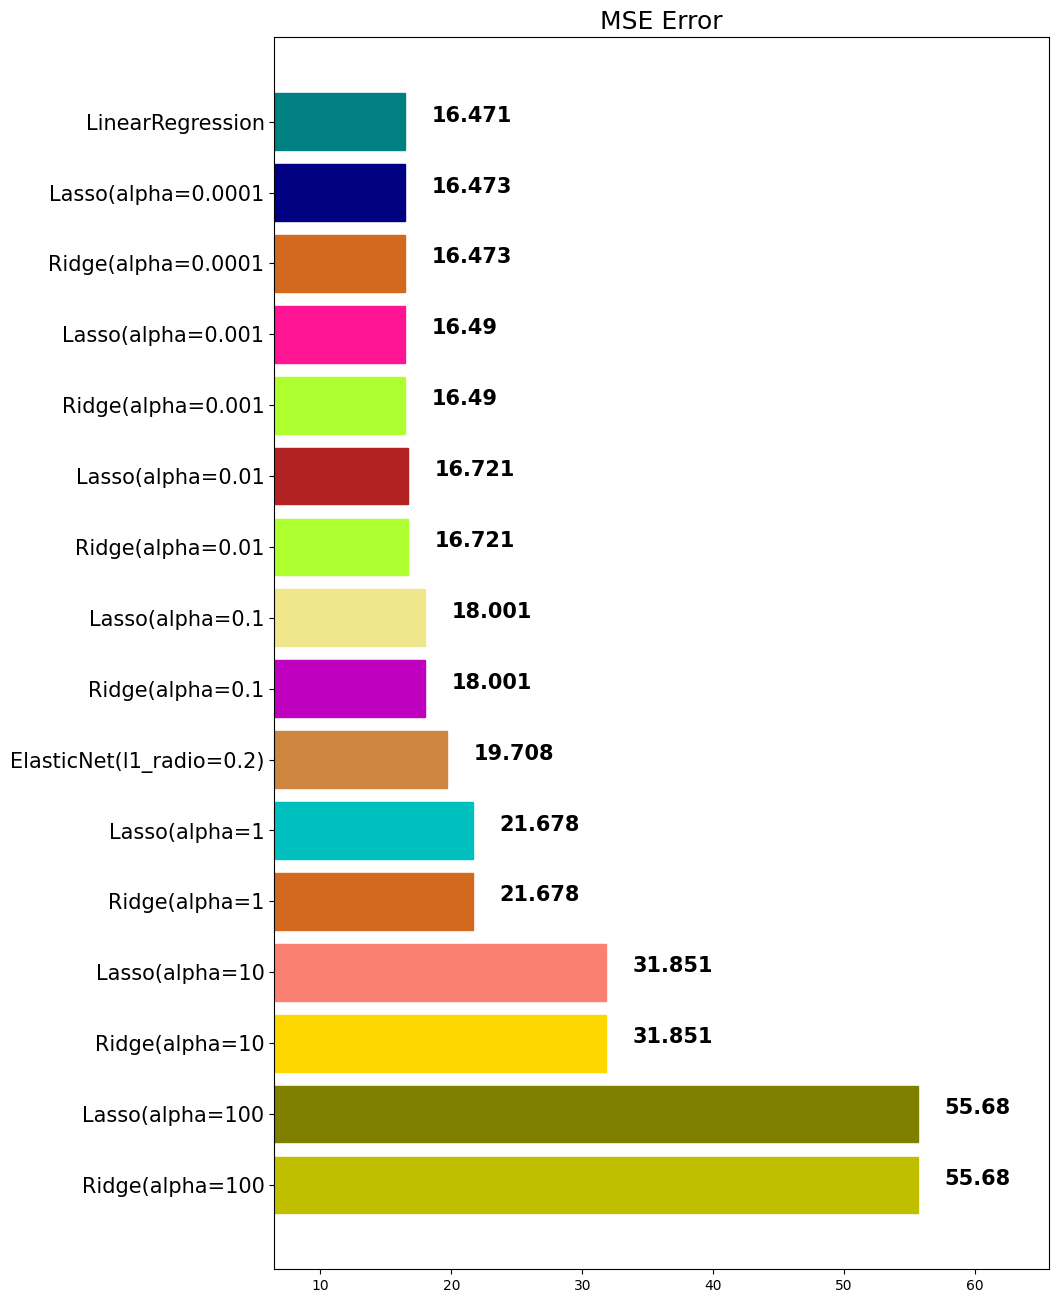

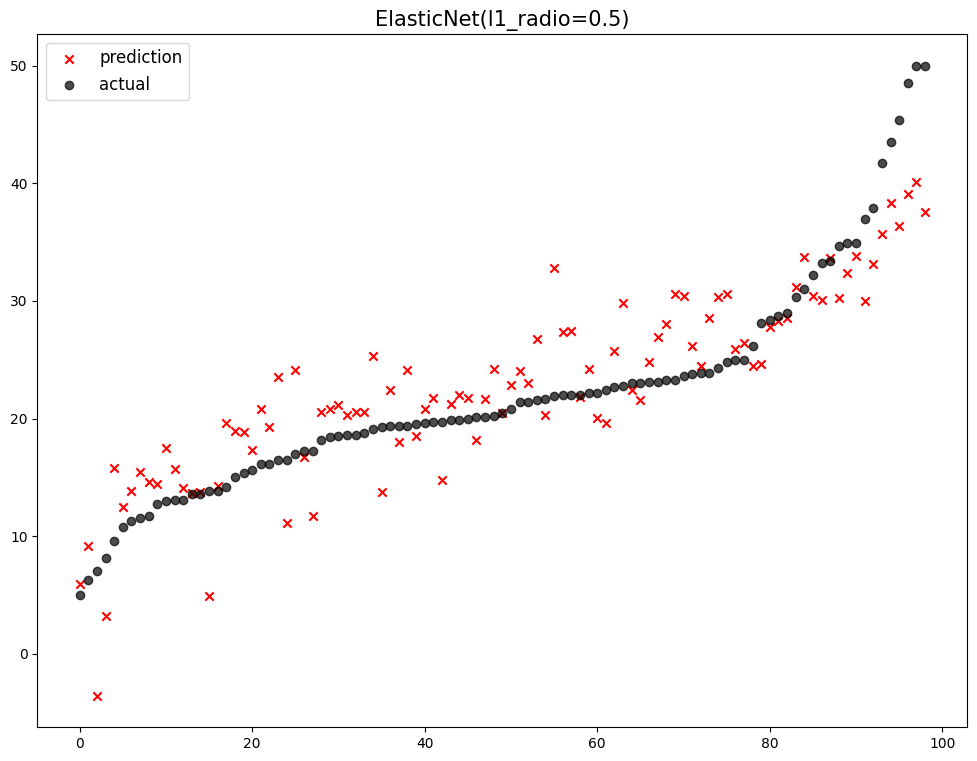

                       model        mse
0            Ridge(alpha=100  55.680054
1            Lasso(alpha=100  55.680054
2             Ridge(alpha=10  31.850946
3             Lasso(alpha=10  31.850946
4              Ridge(alpha=1  21.678470
5              Lasso(alpha=1  21.678470
6   ElasticNet(l1_radio=0.2)  19.707563
7   ElasticNet(l1_radio=0.5)  19.470458
8            Ridge(alpha=0.1  18.000711
9            Lasso(alpha=0.1  18.000711
10          Ridge(alpha=0.01  16.720561
11          Lasso(alpha=0.01  16.720561
12         Ridge(alpha=0.001  16.489815
13         Lasso(alpha=0.001  16.489815
14        Ridge(alpha=0.0001  16.473001
15        Lasso(alpha=0.0001  16.473001
16          LinearRegression  16.471204


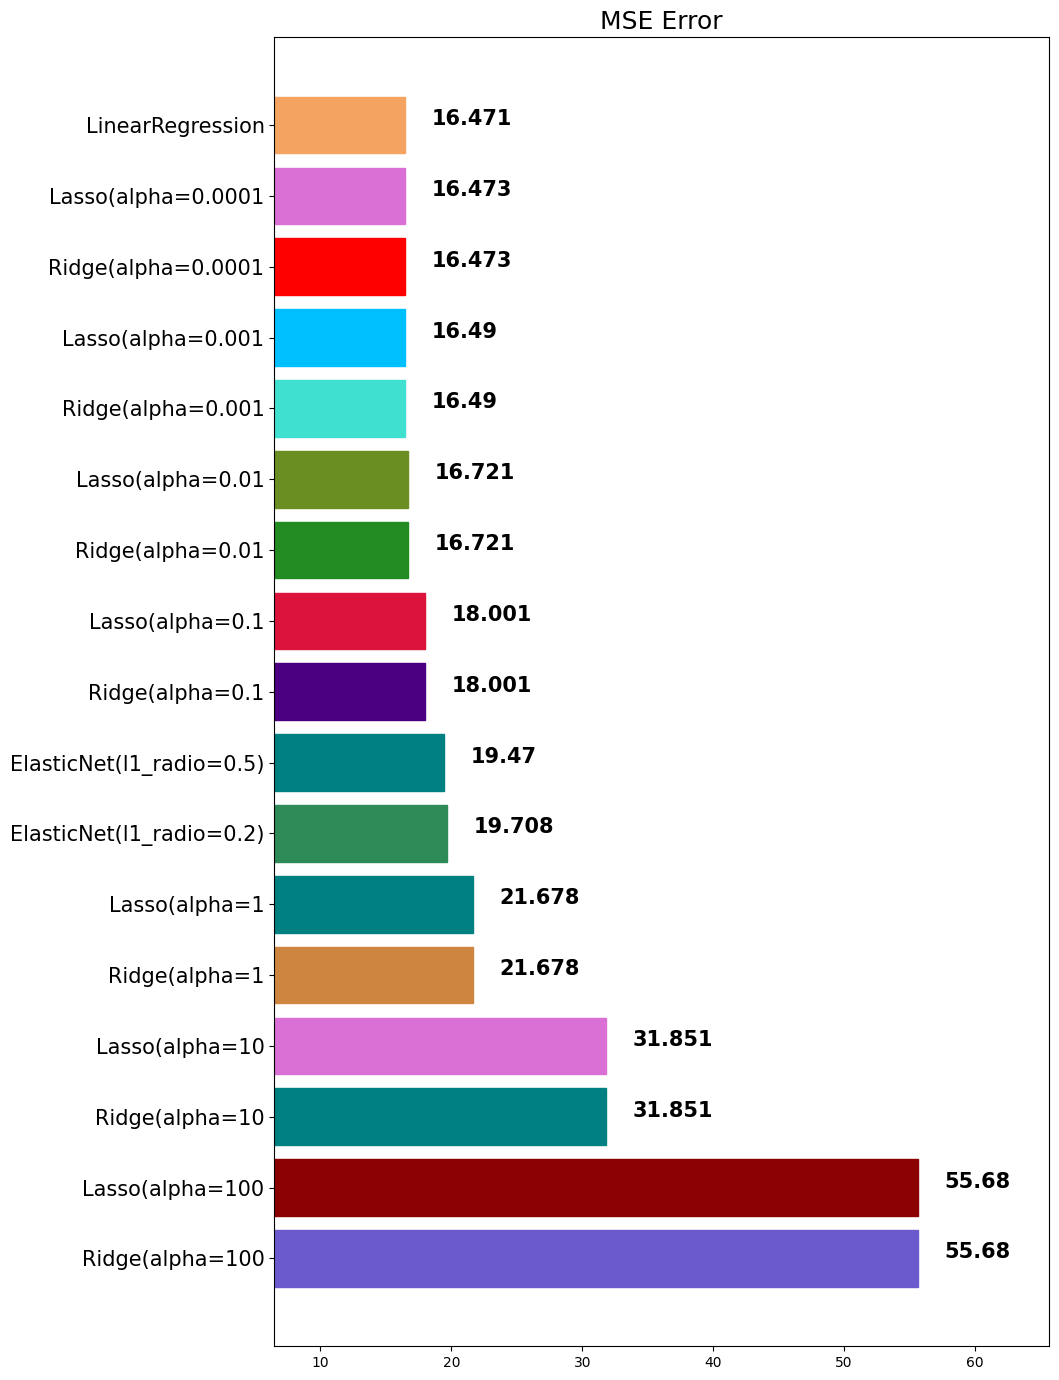

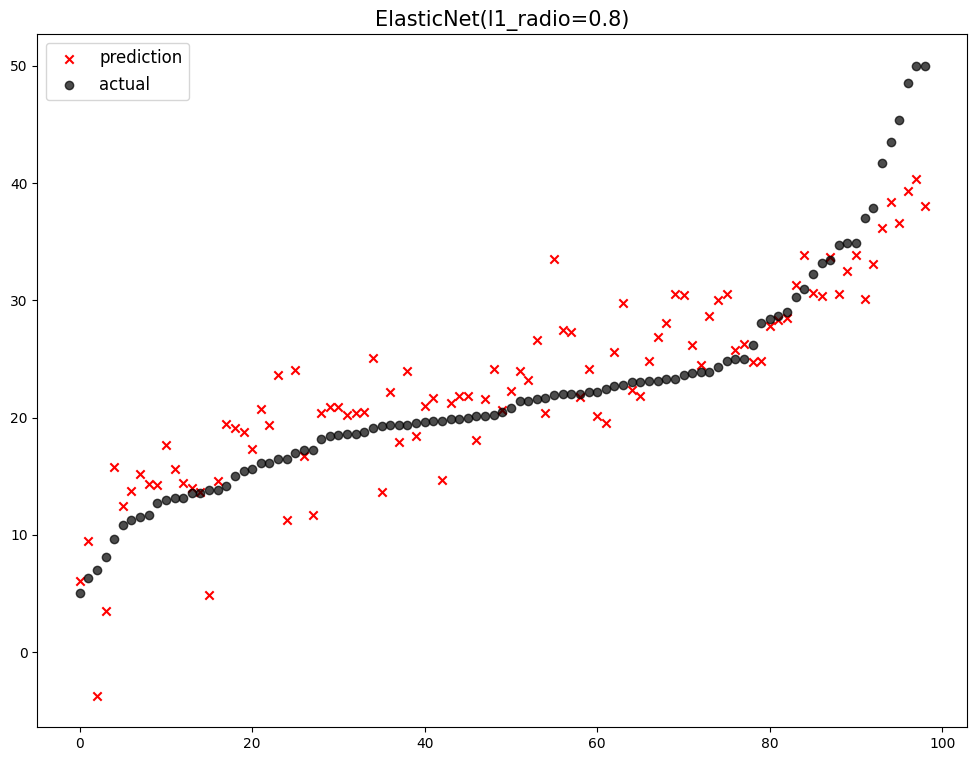

                       model        mse
0            Ridge(alpha=100  55.680054
1            Lasso(alpha=100  55.680054
2             Ridge(alpha=10  31.850946
3             Lasso(alpha=10  31.850946
4              Ridge(alpha=1  21.678470
5              Lasso(alpha=1  21.678470
6   ElasticNet(l1_radio=0.2)  19.707563
7   ElasticNet(l1_radio=0.5)  19.470458
8   ElasticNet(l1_radio=0.8)  19.070724
9            Ridge(alpha=0.1  18.000711
10           Lasso(alpha=0.1  18.000711
11          Ridge(alpha=0.01  16.720561
12          Lasso(alpha=0.01  16.720561
13         Ridge(alpha=0.001  16.489815
14         Lasso(alpha=0.001  16.489815
15        Ridge(alpha=0.0001  16.473001
16        Lasso(alpha=0.0001  16.473001
17          LinearRegression  16.471204


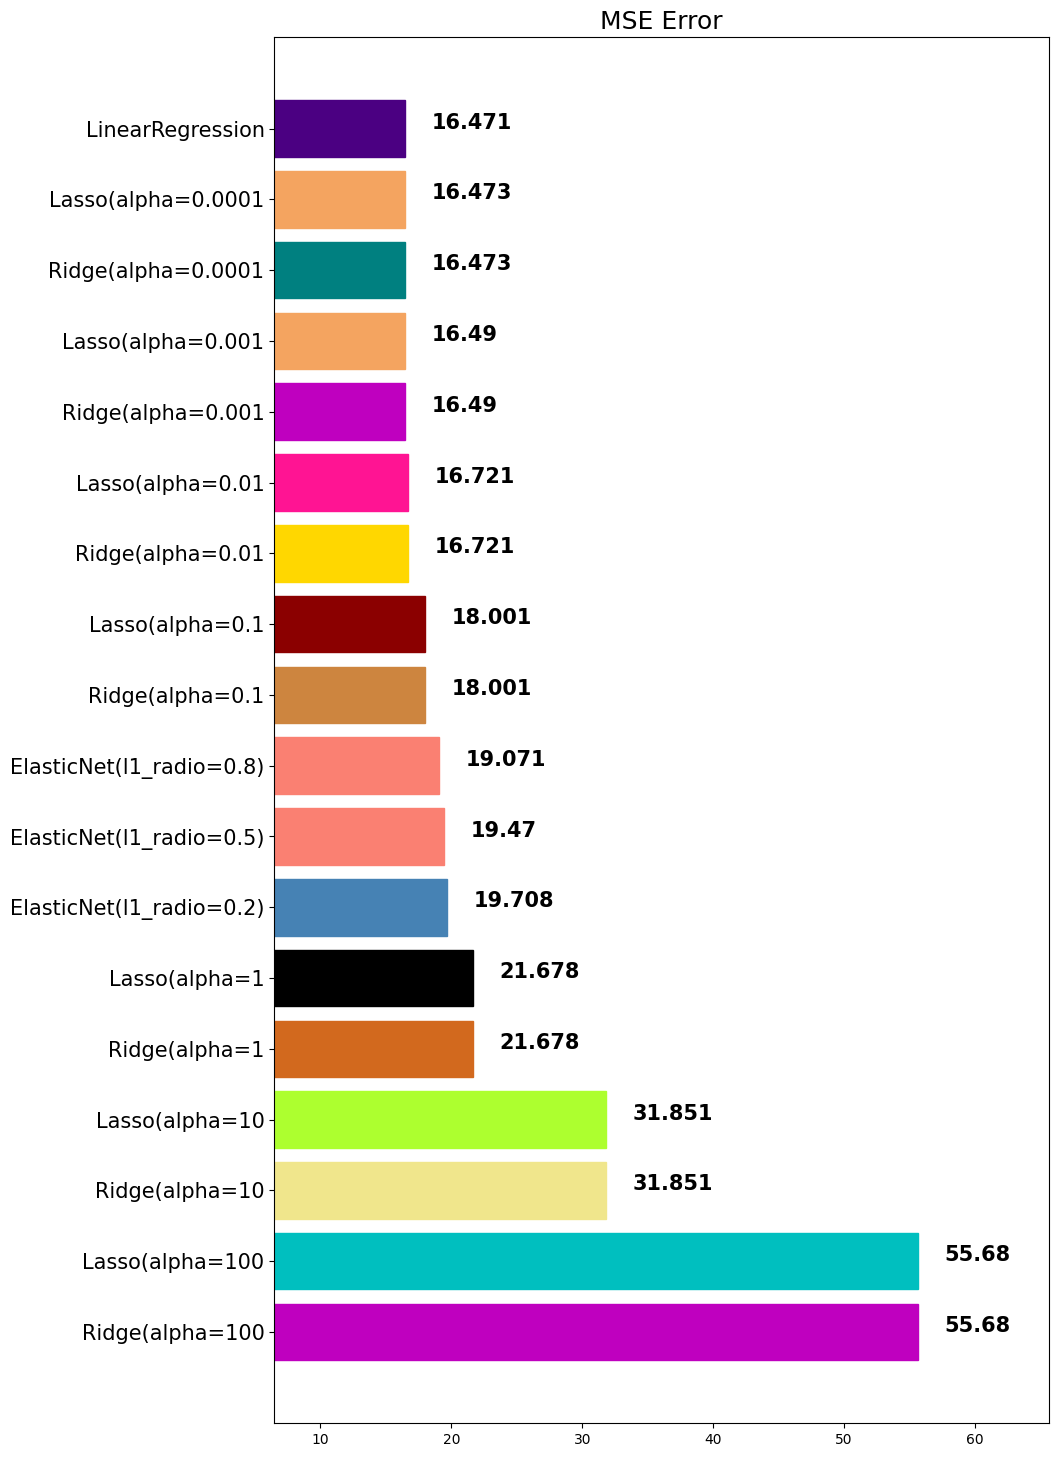

In [ ]:
for ratio in ratios:
  elasticnet = ElasticNet(alpha=0.5, l1_ratio=ratio)
  elasticnet.fit(x_train, y_train)
  pred = elasticnet.predict(x_test)
  mse_eval('ElasticNet(l1_radio={})'.format(ratio), pred, y_test)

In [ ]:
elasticnet_20 = ElasticNet(alpha=5, l1_ratio=0.2)
elasticnet_20.fit(x_train, y_train)
elasticnet_pred_20 = elasticnet_20.predict(x_test)

elasticnet_80 = ElasticNet(alpha=5, l1_ratio=0.8)
elasticnet_80.fit(x_train, y_train)
elasticnet_pred_80 = elasticnet_80.predict(x_test)

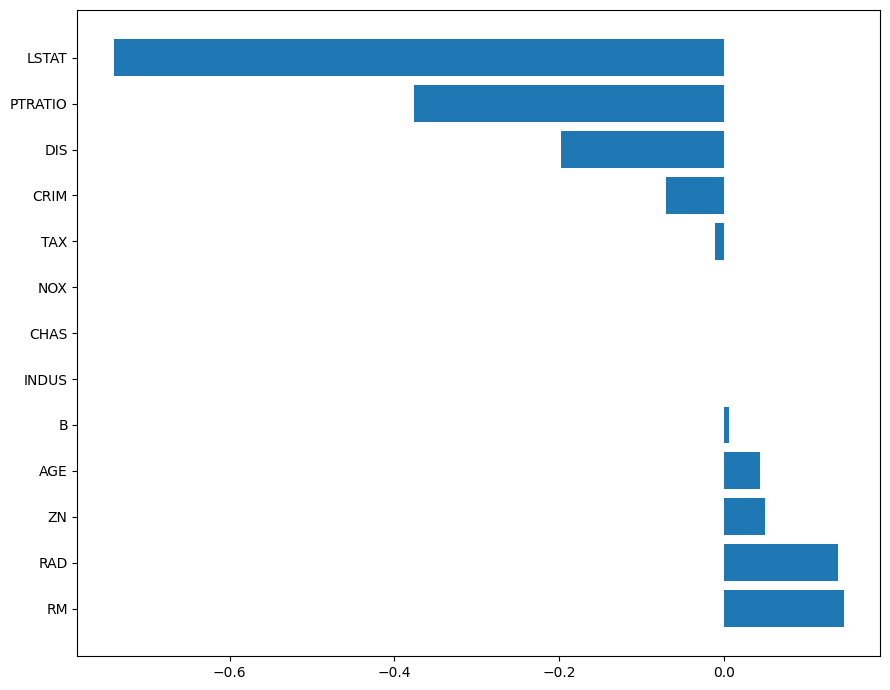

In [ ]:
plot_coef(x_train.columns, elasticnet_20.coef_)

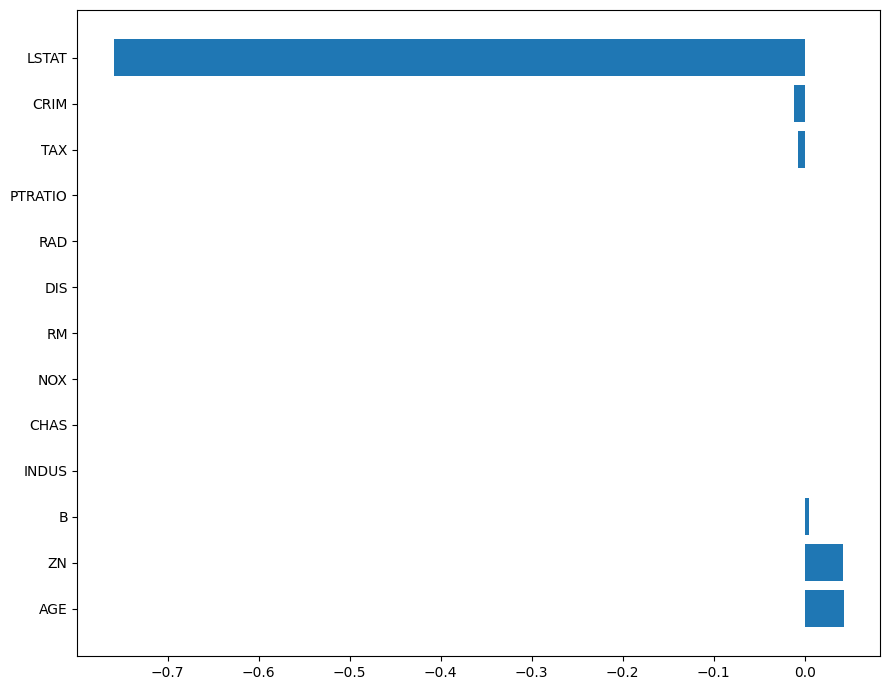

In [ ]:
plot_coef(x_train.columns, elasticnet_80.coef_)

In [ ]:
# 여기서부터 아래는 23.06.17 분량

# 6. **Scaler**

* [velog-사이킷런-파이프라인](https://velog.io/@ljs7463/%EC%82%AC%EC%9D%B4%ED%82%B7%EB%9F%B0-%ED%8C%8C%EC%9D%B4%ED%94%84%EB%9D%BC%EC%9D%B8Pipelines)

# **7. 파이프라인**